### Business Understanding

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman dapat diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan.

Mendefinisikan pertanyaan bisnis yang akan coba dijawab melalui proses analisis ini
1. Apakah ada anomali pada data yang perlu diwaspadai?
2. Siapa segmen nasabah paling beresiko?
3. Apa faktor keuangan utama yang memicu gagal bayar?

### Import Dataset hasil Merging & Library yang diperlukan

In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore', category=FutureWarning, message='.*use_inf_as_na.*')
warnings.filterwarnings('ignore', category=FutureWarning, message='.*observed=False is deprecated.*')
warnings.filterwarnings('ignore', category=FutureWarning, message='.*length-1 list-like.*')

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

In [374]:
merged_df = pd.read_csv('merging_result_for_analysis.csv')
merged_df.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,STATUS_ACTIVE,STATUS_CLOSED,STATUS_BAD_DEBT,TOTAL_CREDITS,RATIO_BAD_TO_TOTAL,CREDIT_GROUP_RETAIL,CREDIT_GROUP_ASSET,CREDIT_GROUP_BUSINESS,RATIO_ASSET_TO_TOTAL,AMT_CREDIT_SUM_MEAN,AMT_CREDIT_SUM_DEBT_MEAN,RATIO_DEBT_TO_CREDIT_MEAN,DAYS_CREDIT_MEAN,DAYS_CREDIT_ENDDATE_MEAN,PREV_APP_COUNT,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_ANNUITY_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_POS_RATIO_ACTIVE_MEAN,PREV_POS_RATIO_COMPLETED_MEAN,PREV_POS_RATIO_PROBLEMATIC_MEAN,PREV_CC_UTILIZATION_MEAN,PREV_CC_AVG_DPD_DEF_MEAN,PREV_INST_PAYMENT_RATIO_MEAN,PREV_INST_LATE_PAYMENT_RATIO_MEAN,PREV_INST_MISSED_PAYMENT_RATE_MEAN,PREV_CONTRACT_STATUS_APPROVED_RATIO,PREV_CONTRACT_STATUS_REFUSED_RATIO,PREV_CONTRACT_STATUS_CANCELED_RATIO,PREV_CONTRACT_STATUS_UNUSED_OFFER_RATIO,PREV_CONTRACT_STATUS_UNKNOWN_RATIO,PREV_CONTRACT_TYPE_CASH_LOANS_RATIO,PREV_CONTRACT_TYPE_CONSUMER_LOANS_RATIO,PREV_CONTRACT_TYPE_REVOLVING_LOANS_RATIO,PREV_CONTRACT_TYPE_UNKNOWN_RATIO,PREV_PORTFOLIO_CASH_RATIO,PREV_PORTFOLIO_CARDS_RATIO,PREV_PORTFOLIO_POS_RATIO,PREV_PORTFOLIO_CARS_RATIO,PREV_PORTFOLIO_UNKNOWN_RATIO,PREV_CLIENT_TYPE_NEW_RATIO,PREV_CLIENT_TYPE_REPEATER_RATIO,PREV_CLIENT_TYPE_REFRESHED_RATIO,PREV_CLIENT_TYPE_UNKNOWN_RATIO,PREV_PRODUCT_TYPE_WALKIN_RATIO,PREV_PRODUCT_TYPE_XSELL_RATIO,PREV_PRODUCT_TYPE_UNKNOWN_RATIO,PREV_REJECT_XAP_RATIO,PREV_REJECT_XNA_RATIO,PREV_REJECT_HC_RATIO,PREV_REJECT_LIMIT_RATIO,PREV_REJECT_SCO_RATIO,PREV_REJECT_SCOFR_RATIO,PREV_REJECT_SYSTEM_RATIO,PREV_REJECT_VERIF_RATIO,PREV_REJECT_UNKNOWN_RATIO
238994,376831,0,Cash loans,M,Y,Y,0,180000.0,454500.0,17739.0,454500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.026392,-9590,-1816,-4451.0,-2254,3.0,1,1,0,1,0,0,Laborers,1.0,2,2,

In [375]:
print(f'Jumlah baris dan kolom pada dataset hasil merging ini yaitu: {merged_df.shape}')

Jumlah baris dan kolom pada dataset hasil merging ini yaitu: (307511, 181)


### Cleaning Data

#### Duplicate data

In [376]:
merged_df.duplicated().sum()

0

Tidak ada data yang terduplikat secara keseluruhan

#### Terkait missing value

In [377]:
missing_threshold = 0.4
missing_data = merged_df.isnull().sum()
missing_data = missing_data[missing_data > missing_threshold * len(merged_df)]
print(f"Kolom dengan missing value >= {missing_threshold*100}% adalah: {len(missing_data)}")
missing_data.sort_values(ascending=False)

Kolom dengan missing value >= 40.0% adalah: 49


COMMONAREA_AVG                  214865
COMMONAREA_MEDI                 214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MEDI                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_MEDI                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

- Dari hasil missing value ini, akan dihapus kolom-kolom yang berkaitan dengan informasi properti (Alasannya yaitu missing rate yang dihasilkan cukup tinggi, data yang tidak terinput ini bisa menandakan banyaknya pengguna yang tidak relevan dengan hal tersebut, dapat menimbulkan noise ketika masuk hingga tahap pembuatan model machine learning) dan kepemilikian barang tertentu (seperti mobil)

In [378]:
property_keywords = [
    'AREA', 'APARTMENTS', 'FLOOR', 'YEARS_BUILD', 'YEARS_BEGIN', 
    'LIVING', 'ENTRANCES', 'ELEVATORS', 'HOUSETYPE', 'WALLSMATERIAL', 
    'FONDKAPREMONT', 'NONLIVING', 'LANDAREA', 'BASEMENT', 'COMMON', 'TOTALAREA', 'OWN_CAR_AGE', 'EMERGENCYSTATE'
]

property_cols = [col for col in merged_df.columns if any(keyword in col.upper() for keyword in property_keywords)]

print(f'Jumlah kolom properti yang akan dihapus: {len(property_cols)}')
print(f'List kolom properti yang akan dihapus: {property_cols}')

Jumlah kolom properti yang akan dihapus: 48
List kolom properti yang akan dihapus: ['OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_

In [379]:
merged_df.drop(columns=property_cols, inplace=True, errors='ignore')
print(f'Jumlah kolom setelah penghapusan kolom properti: {merged_df.shape[1]}')

Jumlah kolom setelah penghapusan kolom properti: 133


- Nilai missing value yang masih belum dilakukan tindakan yaitu EXT_SOURCE_1
- Kolom tersebut akan diimputasi dengan nilai median/rata-rata dari kolom tersebut (tidak dibuang karena mendefinisikan skor eksternal data)

In [380]:
merged_df['EXT_SOURCE_1'].value_counts(dropna=False)

EXT_SOURCE_1
NaN         173378
0.581015         5
0.546426         5
0.443982         5
0.765724         5
             ...  
0.658473         1
0.318295         1
0.834644         1
0.485406         1
0.734460         1
Name: count, Length: 114585, dtype: int64

In [381]:
merged_df['EXT_SOURCE_1'].fillna(merged_df['EXT_SOURCE_1'].median(), inplace=True)

C:\Users\hardi\AppData\Local\Temp\ipykernel_20708\3085836030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['EXT_SOURCE_1'].fillna(merged_df['EXT_SOURCE_1'].median(), inplace=True)


Selanjutnya yaitu melihat adanya missing value pada sisa kolom yang ada untuk dilakukan penanganan imputasi

In [382]:
print('Jumlah kolom yang masih memiliki missing value setelah penanganan EXT_SOURCE_1:')
merged_df.isnull().sum()[merged_df.isnull().sum() > 0].sort_values(ascending=False)

Jumlah kolom yang masih memiliki missing value setelah penanganan EXT_SOURCE_1:


OCCUPATION_TYPE              96391
EXT_SOURCE_3                 60965
RATIO_DEBT_TO_CREDIT_MEAN    45103
AMT_CREDIT_SUM_MEAN          44021
CREDIT_GROUP_ASSET           44020
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 77, dtype: int64

Bagian cell notebook di bawah ini akan mengelompokkan penanganan missing value berdasarkan konteks datanya

In [383]:
cat_features = ['OCCUPATION_TYPE', 'NAME_TYPE_SUITE']
num_features_median = [
    'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'
]

prev_ratio_features = [c for c in merged_df.columns if c.startswith('PREV_') and c.endswith('_RATIO')]
prev_mean_features = [c for c in merged_df.columns if c.startswith('PREV_') and c.endswith('_MEAN')]
prev_count_features = [c for c in ['PREV_APP_COUNT'] if c in merged_df.columns]

social_features = [
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
]

In [384]:
merged_df[cat_features] = merged_df[cat_features].fillna('Unknown')

In [385]:
for col in num_features_median:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())

for col in social_features:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())

In [386]:
def _fillna_existing(cols, value):
    existing = [c for c in cols if c in merged_df.columns]
    if existing:
        merged_df[existing] = merged_df[existing].fillna(value)

explicit_zero_cols = [
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'STATUS_ACTIVE',
    'STATUS_CLOSED',
    'STATUS_BAD_DEBT',
    'TOTAL_CREDITS',
    'RATIO_BAD_TO_TOTAL',
    'CREDIT_GROUP_RETAIL',
    'CREDIT_GROUP_ASSET',
    'CREDIT_GROUP_BUSINESS',
    'RATIO_ASSET_TO_TOTAL',
    'AMT_CREDIT_SUM_MEAN',
    'AMT_CREDIT_SUM_DEBT_MEAN',
    'RATIO_DEBT_TO_CREDIT_MEAN',
    'DAYS_CREDIT_MEAN',
    'DAYS_CREDIT_ENDDATE_MEAN',
    'PREV_APP_COUNT',
    'PREV_AMT_APPLICATION_MEAN',
    'PREV_AMT_CREDIT_MEAN',
    'PREV_AMT_ANNUITY_MEAN',
    'PREV_AMT_GOODS_PRICE_MEAN',
    'PREV_DAYS_DECISION_MEAN',
    'PREV_CNT_PAYMENT_MEAN',
    'PREV_POS_RATIO_ACTIVE_MEAN',
    'PREV_POS_RATIO_COMPLETED_MEAN',
    'PREV_POS_RATIO_PROBLEMATIC_MEAN',
    'PREV_CC_UTILIZATION_MEAN',
    'PREV_CC_AVG_DPD_DEF_MEAN',
    'PREV_INST_PAYMENT_RATIO_MEAN',
    'PREV_INST_LATE_PAYMENT_RATIO_MEAN',
    'PREV_INST_MISSED_PAYMENT_RATE_MEAN',
    'PREV_CONTRACT_STATUS_APPROVED_RATIO',
    'PREV_CONTRACT_STATUS_REFUSED_RATIO',
    'PREV_CONTRACT_STATUS_CANCELED_RATIO',
    'PREV_CONTRACT_STATUS_UNUSED_OFFER_RATIO',
    'PREV_CONTRACT_STATUS_UNKNOWN_RATIO',
    'PREV_CONTRACT_TYPE_CASH_LOANS_RATIO',
    'PREV_CONTRACT_TYPE_CONSUMER_LOANS_RATIO',
    'PREV_CONTRACT_TYPE_REVOLVING_LOANS_RATIO',
    'PREV_CONTRACT_TYPE_UNKNOWN_RATIO',
    'PREV_PORTFOLIO_CASH_RATIO',
    'PREV_PORTFOLIO_CARDS_RATIO',
    'PREV_PORTFOLIO_POS_RATIO',
    'PREV_PORTFOLIO_CARS_RATIO',
    'PREV_PORTFOLIO_UNKNOWN_RATIO',
    'PREV_CLIENT_TYPE_NEW_RATIO',
    'PREV_CLIENT_TYPE_REPEATER_RATIO',
    'PREV_CLIENT_TYPE_REFRESHED_RATIO',
    'PREV_CLIENT_TYPE_UNKNOWN_RATIO',
    'PREV_PRODUCT_TYPE_WALKIN_RATIO',
    'PREV_PRODUCT_TYPE_XSELL_RATIO',
    'PREV_PRODUCT_TYPE_UNKNOWN_RATIO',
    'PREV_REJECT_XAP_RATIO',
    'PREV_REJECT_XNA_RATIO',
    'PREV_REJECT_HC_RATIO',
    'PREV_REJECT_LIMIT_RATIO',
    'PREV_REJECT_SCO_RATIO',
    'PREV_REJECT_SCOFR_RATIO',
    'PREV_REJECT_SYSTEM_RATIO',
    'PREV_REJECT_VERIF_RATIO',
    'PREV_REJECT_UNKNOWN_RATIO',
]

zero_fill_cols = sorted(set(
    explicit_zero_cols + prev_ratio_features + prev_mean_features + prev_count_features
))
_fillna_existing(zero_fill_cols, 0)

check_cols = [c for c in explicit_zero_cols if c in merged_df.columns]
still_missing = merged_df[check_cols].isna().sum()
still_missing = still_missing[still_missing > 0].sort_values(ascending=False)
print('Missing setelah zero-imputation (kolom list user):')
print(still_missing if not still_missing.empty else '0 (tidak ada missing)')

Missing setelah zero-imputation (kolom list user):
0 (tidak ada missing)


Alasan setiap tindakan penanganan yang berbeda:
1. Kategorikal:
    - Missing umumnya karena nasabah tidak mengisi atau tidak relevan (mis. pekerjaan informal).
    - Mengganti dengan "Unknown" menjaga distribusi dan memungkinkan model mengenali non-response pattern tanpa menghapus data.
2. Fitur angka yang diimputasi dengan nilai median:
    - Nilai finansial dan demografis sering memiliki outlier sehingga median lebih robust dibanding mean.
    - Mempertahankan skala dan distribusi tanpa menciptakan bias dari nilai ekstrem.
3. Fitur angka yang diimputasi dengan nilai 0:
    - Missing di sini tidak berarti data hilang, tapi memang tidak ada aktivitas (mis. tidak punya kredit, tidak pernah ajukan pinjaman, tidak ada pembayaran).
    - 0 mewakili “absence of event” dengan semantik bisnis yang jelas, bukan kehilangan data.
    - Menghindari distorsi pada proporsi/rasio yang bisa muncul jika diisi median.
4. Fitur One-Hot yang diimputasi dengan nilai 0:
    - Variabel dummy = indikator biner (1 aktif, 0 tidak).
    - Missing berarti kategori tersebut tidak relevan untuk nasabah itu → isi 0 agar konsisten.

In [387]:
print(f'Jumlah kolom yang masih memiliki missing value setelah semua penanganan: {merged_df.isna().sum()[merged_df.isna().sum() > 0].count()}')

Jumlah kolom yang masih memiliki missing value setelah semua penanganan: 0


Sudah tidak ada missing value yang terdapat pada dataset ini

#### Konsistensi tipe data

In [388]:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 133 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    SK_ID_CURR                                int64  
 1    TARGET                                    int64  
 2    NAME_CONTRACT_TYPE                        object 
 3    CODE_GENDER                               object 
 4    FLAG_OWN_CAR                              object 
 5    FLAG_OWN_REALTY                           object 
 6    CNT_CHILDREN                              int64  
 7    AMT_INCOME_TOTAL                          float64
 8    AMT_CREDIT                                float64
 9    AMT_ANNUITY                               float64
 10   AMT_GOODS_PRICE                           float64
 11   NAME_TYPE_SUITE                           object 
 12   NAME_INCOME_TYPE                          object 
 13   NAME_EDUCATION_TYPE                       

In [389]:
def list_type_data(typedata):
    print(f'Ini adalah list kolom dengan tipe data {typedata}: ')
    return list(merged_df.select_dtypes(include=typedata).columns)

Di bawah ini telah dikelompokkan masing-masing kolom berdasarkan tipe data yang ada

In [390]:
list_type_data('float')

Ini adalah list kolom dengan tipe data float: 


['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'STATUS_ACTIVE',
 'STATUS_CLOSED',
 'STATUS_BAD_DEBT',
 'TOTAL_CREDITS',
 'RATIO_BAD_TO_TOTAL',
 'CREDIT_GROUP_RETAIL',
 'CREDIT_GROUP_ASSET',
 'CREDIT_GROUP_BUSINESS',
 'RATIO_ASSET_TO_TOTAL',
 'AMT_CREDIT_SUM_MEAN',
 'AMT_CREDIT_SUM_DEBT_MEAN',
 'RATIO_DEBT_TO_CREDIT_MEAN',
 'DAYS_CREDIT_MEAN',
 'DAYS_CREDIT_ENDDATE_MEAN',
 'PREV_APP_COUNT',
 'PREV_AMT_APPLICATION_MEAN',
 'PREV_AMT_CREDIT_MEAN',
 'PREV_AMT_ANNUITY_MEAN',
 'PREV_AMT_GOODS_PRICE_MEAN',
 'PREV_DAYS_DECISION

Semua kolom dengan tipe data 'float' telah sesuai dikarenakan:
- Berisi nilai kontinu seperti jumlah uang, rasio, rata-rata, atau proporsi yang memerlukan presisi desimal.
- Dibutuhkan untuk operasi matematis dan statistik (scaling, log transform, rasio antar variabel).
- Banyak berasal dari hasil agregasi (mean, ratio) sehingga wajar memiliki nilai pecahan.

In [391]:
list_type_data('int')

Ini adalah list kolom dengan tipe data int: 


['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

Semua kolom dengan tipe data 'int' telah sesuai dikarenakan:
- Berisi nilai diskret seperti hitungan, ID, label biner (0/1), atau jumlah hari.
- Tidak membutuhkan desimal karena mewakili status atau frekuensi yang pasti.
- Efisien secara memori dan menjaga makna logis (mis. jumlah dokumen, flag kepemilikan).

In [392]:
list_type_data('object')

Ini adalah list kolom dengan tipe data object: 


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

Semua kolom dengan tipe data 'object' telah sesuai dikarenakan:
- Berisi label teks atau kategori nominal seperti jenis kontrak, pekerjaan, atau status keluarga.
- Nilainya bersifat kualitatif — tidak memiliki urutan numerik alami.
- Cocok digunakan untuk encoding (One-Hot / Ordinal) pada tahap pemodelan selanjutnya.

#### Pengecekan terkait Data Kategorikal

In [393]:
list_object = list_type_data('object')
list_object

Ini adalah list kolom dengan tipe data object: 


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [394]:
for i in list_object:
    print(f'Jenis kategori pada kolom: {i}')
    print(merged_df[i].value_counts())
    print('\n-----------------------------------\n')

Jenis kategori pada kolom: NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

-----------------------------------

Jenis kategori pada kolom: CODE_GENDER
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

-----------------------------------

Jenis kategori pada kolom: FLAG_OWN_CAR
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

-----------------------------------

Jenis kategori pada kolom: FLAG_OWN_REALTY
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

-----------------------------------

Jenis kategori pada kolom: NAME_TYPE_SUITE
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Unknown              1292
Other_A               866
Group of people       271
Name: count, dtype: int64

-----------------------------------

Jenis kategori pada kolom: NAME_INCOME_TYPE

Terdapat beberapa kategori pada kolom tertentu yang bisa digabungkan:
1. Kolom 'NAME_TYPE_SUITE': Menggabungkan Other_A, Other_B, Group of people, Unknown (kemungkinan konteksnya sama) menjadi satu kategori 'Other'
2. Kolom 'NAME_INCOME_TYPE' : Menggabungkan kategori langka (Unemployed, Student, & Maternitiy leave) menjadi satu kategori 'Other'
3. Kolom 'ORGANIZATION_TYPE' : Mengelompokkan tipe yang sejenis ke satu kategori yang sama   

In [395]:
suite_map = {
    'Unaccompanied': 'Unaccompanied',
    'Family': 'Family/Spouse',
    'Spouse, partner': 'Family/Spouse',
    'Children': 'With Children',
    'Other_A': 'Other',
    'Other_B': 'Other',
    'Group of people': 'Other',
    'Unknown': 'Other'
}

merged_df['NAME_TYPE_SUITE_GROUP'] = merged_df['NAME_TYPE_SUITE'].map(suite_map)

In [396]:
income_map = {
    'Working': 'Working',
    'Commercial associate': 'Commercial associate',
    'Businessman': 'Businessman',
    'Pensioner': 'Pensioner',
    'State servant': 'State servant',
    'Unemployed': 'Other',
    'Student': 'Other',
    'Maternity leave': 'Other'
}

merged_df['NAME_INCOME_TYPE_GROUP'] = merged_df['NAME_INCOME_TYPE'].map(income_map)

In [397]:
org_map = {
    # Private / Business
    'Business Entity Type 1': 'Private/Business',
    'Business Entity Type 2': 'Private/Business',
    'Business Entity Type 3': 'Private/Business',
    'Trade: type 1': 'Private/Business',
    'Trade: type 2': 'Private/Business',
    'Trade: type 3': 'Private/Business',
    'Trade: type 4': 'Private/Business',
    'Trade: type 5': 'Private/Business',
    'Trade: type 6': 'Private/Business',
    'Trade: type 7': 'Private/Business',
    'Industry: type 1': 'Private/Business',
    'Industry: type 2': 'Private/Business',
    'Industry: type 3': 'Private/Business',
    'Industry: type 4': 'Private/Business',
    'Industry: type 5': 'Private/Business',
    'Industry: type 6': 'Private/Business',
    'Industry: type 7': 'Private/Business',
    'Industry: type 8': 'Private/Business',
    'Industry: type 9': 'Private/Business',
    'Industry: type 10': 'Private/Business',
    'Industry: type 11': 'Private/Business',
    'Industry: type 12': 'Private/Business',
    'Industry: type 13': 'Private/Business',
    'Construction': 'Private/Business',
    'Transport: type 1': 'Private/Business',
    'Transport: type 2': 'Private/Business',
    'Transport: type 3': 'Private/Business',
    'Transport: type 4': 'Private/Business',
    'Restaurant': 'Private/Business',
    'Hotel': 'Private/Business',
    'Services': 'Private/Business',
    'Cleaning': 'Private/Business',
    'Advertising': 'Private/Business',
    'Mobile': 'Private/Business',
    'Telecom': 'Private/Business',
    'Insurance': 'Private/Business',
    'Realtor': 'Private/Business',

    # Government / Public
    'Government': 'Public/Government',
    'Police': 'Public/Government',
    'Military': 'Public/Government',
    'Security Ministries': 'Public/Government',
    'Postal': 'Public/Government',
    'Emergency': 'Public/Government',
    'Electricity': 'Public/Government',
    'Religion': 'Public/Government',

    # Education
    'School': 'Education',
    'University': 'Education',
    'Kindergarten': 'Education',

    # Healthcare
    'Medicine': 'Healthcare',
    'Hospital': 'Healthcare',

    # Construction / Infrastructure
    'Housing': 'Infrastructure/Construction',
    'Transport': 'Infrastructure/Construction',

    # Finance / Legal / Professional
    'Bank': 'Finance/Professional',
    'Legal Services': 'Finance/Professional',
    'Security': 'Finance/Professional',

    # Agriculture
    'Agriculture': 'Agriculture',

    # Unknown / Other
    'XNA': 'Other/Unknown',
    'Other': 'Other/Unknown',
    'Culture': 'Other/Unknown'
}

# Terapkan mapping
merged_df['ORGANIZATION_TYPE_GROUP'] = merged_df['ORGANIZATION_TYPE'].map(org_map).fillna('Other/Unknown')


Pengecekan kembali pada 3 kategori yang telah diubah

In [398]:
list_changed = ['NAME_TYPE_SUITE_GROUP', 'NAME_INCOME_TYPE_GROUP', 'ORGANIZATION_TYPE_GROUP']
for col in list_changed:
    print(f'Jenis kategori pada kolom: {col}')
    print(merged_df[col].value_counts())
    print('\n-----------------------------------\n')

Jenis kategori pada kolom: NAME_TYPE_SUITE_GROUP
NAME_TYPE_SUITE_GROUP
Unaccompanied    248526
Family/Spouse     51519
Other              4199
With Children      3267
Name: count, dtype: int64

-----------------------------------

Jenis kategori pada kolom: NAME_INCOME_TYPE_GROUP
NAME_INCOME_TYPE_GROUP
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Other                       45
Businessman                 10
Name: count, dtype: int64

-----------------------------------

Jenis kategori pada kolom: ORGANIZATION_TYPE_GROUP
ORGANIZATION_TYPE_GROUP
Private/Business               135794
Other/Unknown                  110848
Public/Government               21105
Education                       17100
Healthcare                      11193
Finance/Professional             6059
Infrastructure/Construction      2958
Agriculture                      2454
Name: count, dtype: int64

-----------------------------------



### Exploratory Data Analysis

#### Statistik Deskriptif

In [399]:
print("Statistik Deskriptif dari dataset ini:")
merged_df.describe()

Statistik Deskriptif dari dataset ini:


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,STATUS_ACTIVE,STATUS_CLOSED,STATUS_BAD_DEBT,TOTAL_CREDITS,RATIO_BAD_TO_TOTAL,CREDIT_GROUP_RETAIL,CREDIT_GROUP_ASSET,CREDIT_GROUP_BUSINESS,RATIO_ASSET_TO_TOTAL,AMT_CREDIT_SUM_MEAN,AMT_CREDIT_SUM_DEBT_MEAN,RATIO_DEBT_TO_CREDIT_MEAN,DAYS_CREDIT_MEAN,DAYS_CREDIT_ENDDATE_MEAN,PREV_APP_COUNT,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_ANNUITY_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_POS_RATIO_ACTIVE_MEAN,PREV_POS_RATIO_COMPLETED_MEAN,PREV_POS_RATIO_PROBLEMATIC_MEAN,PREV_CC_UTILIZATION_MEAN,PREV_CC_AVG_DPD_DEF_MEAN,PREV_INST_PAYMENT_RATIO_MEAN,PREV_INST_LATE_PAYMENT_RATIO_MEAN,PREV_INST_MISSED_PAYMENT_RATE_MEAN,PREV_CONTRACT_STATUS_APPROVED_RATIO,PREV_CONTRACT_STATUS_REFUSED_RATIO,PREV_CONTRACT_STATUS_CANCELED_RATIO,PREV_CONTRACT_STATUS_UNUSED_OFFER_RATIO,PREV_CONTRACT_STATUS_UNKNOWN_RATIO,PREV_CONTRACT_TYPE_CASH_LOANS_RATIO,PREV_CONTRACT_TYPE_CONSUMER_LOANS_RATIO,PREV_CONTRACT_TYPE_REVOLVING_LOANS_RATIO,PREV_CONTRACT_TYPE_UNKNOWN_RATIO,PREV_PORTFOLIO_CASH_RATIO,PREV_PORTFOLIO_CARDS_RATIO,PREV_PORTFOLIO_POS_RATIO,PREV_PORTFOLIO_CARS_RATIO,PREV_PORTFOLIO_UNKNOWN_RATIO,PREV_CLIENT_TYPE_NEW_RATIO,PREV_CLIENT_TYPE_REPEATER_RATIO,PREV_CLIENT_TYPE_REFRESHED_RATIO,PREV_CLIENT_TYPE_UNKNOWN_RATIO,PREV_PRODUCT_TYPE_WALKIN_RATIO,PREV_PRODUCT_TYPE_XSELL_RATIO,PREV_PRODUCT_TYPE_UNKNOWN_RATIO,PREV_REJECT_XAP_RATIO,PREV_REJECT_XNA_RATIO,PREV_REJECT_HC_RATIO,PREV_REJECT_LIMIT_RATIO,PREV_REJECT_SCO_RATIO,PREV_REJECT_SCOFR_RATIO,PREV_REJECT_SYSTEM_RATIO,PREV_REJECT_VERIF_RATIO,PREV_REJECT_UNKNOWN_RATIO
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.0000

#### Distribusi variable target

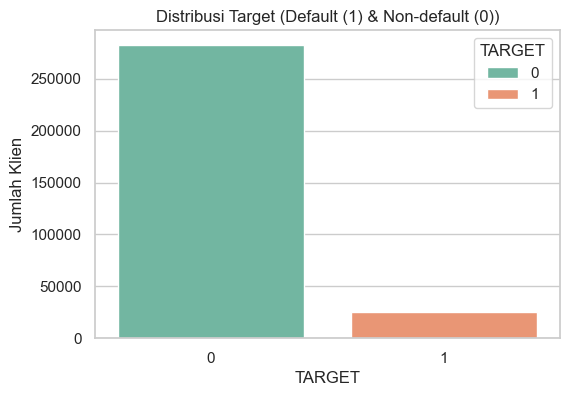

Default Rate: 8.07%


In [400]:
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=merged_df, hue='TARGET', palette='Set2')
plt.title('Distribusi Target (Default (1) & Non-default (0))')
plt.ylabel('Jumlah Klien')
plt.show()

default_rate = merged_df['TARGET'].mean()
print(f"Default Rate: {default_rate:.2%}")

#### Analisis Univariat

Distribusi beberapa variable numerik utama

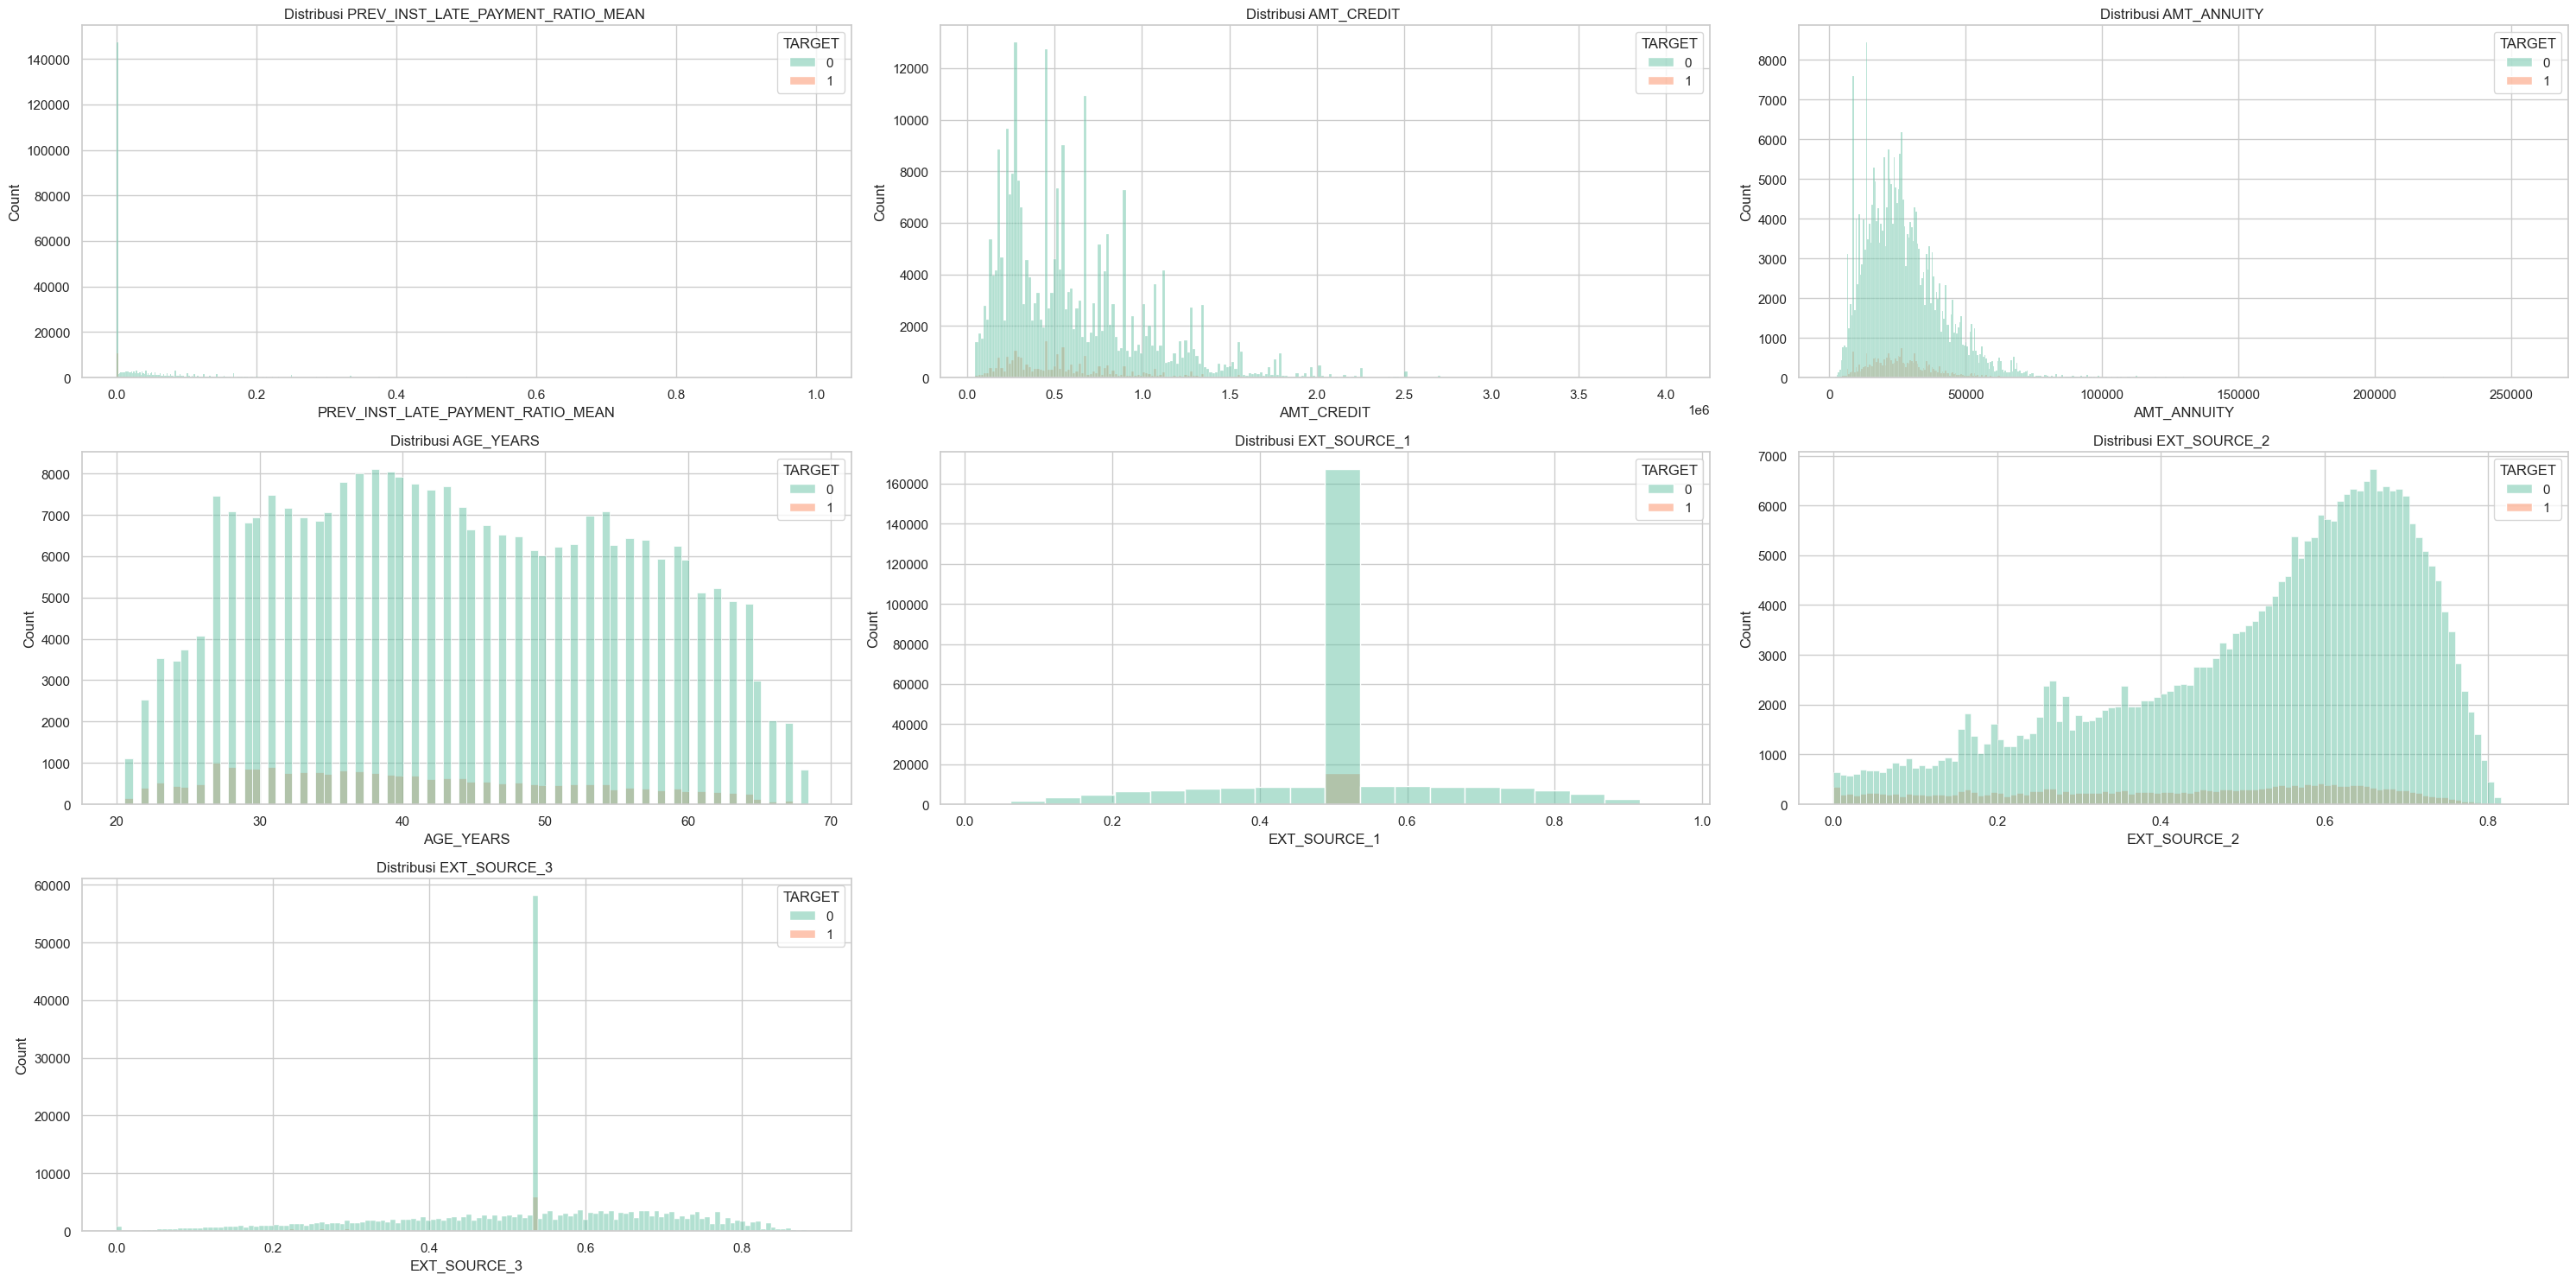

In [401]:
merged_df['AGE_YEARS'] = (-merged_df['DAYS_BIRTH'] / 365).astype(int)
cols_group1 = [
    'PREV_INST_LATE_PAYMENT_RATIO_MEAN',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AGE_YEARS',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
]

fig, axes = plt.subplots(3, 3, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(cols_group1):
    ax = axes[i]
    sns.histplot(data=merged_df, x=col, hue='TARGET', common_norm=False, ax=ax, palette='Set2')
    ax.set_title(f'Distribusi {col} ')

for j in range(len(cols_group1), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Analisis fitur kategorikal tertentu

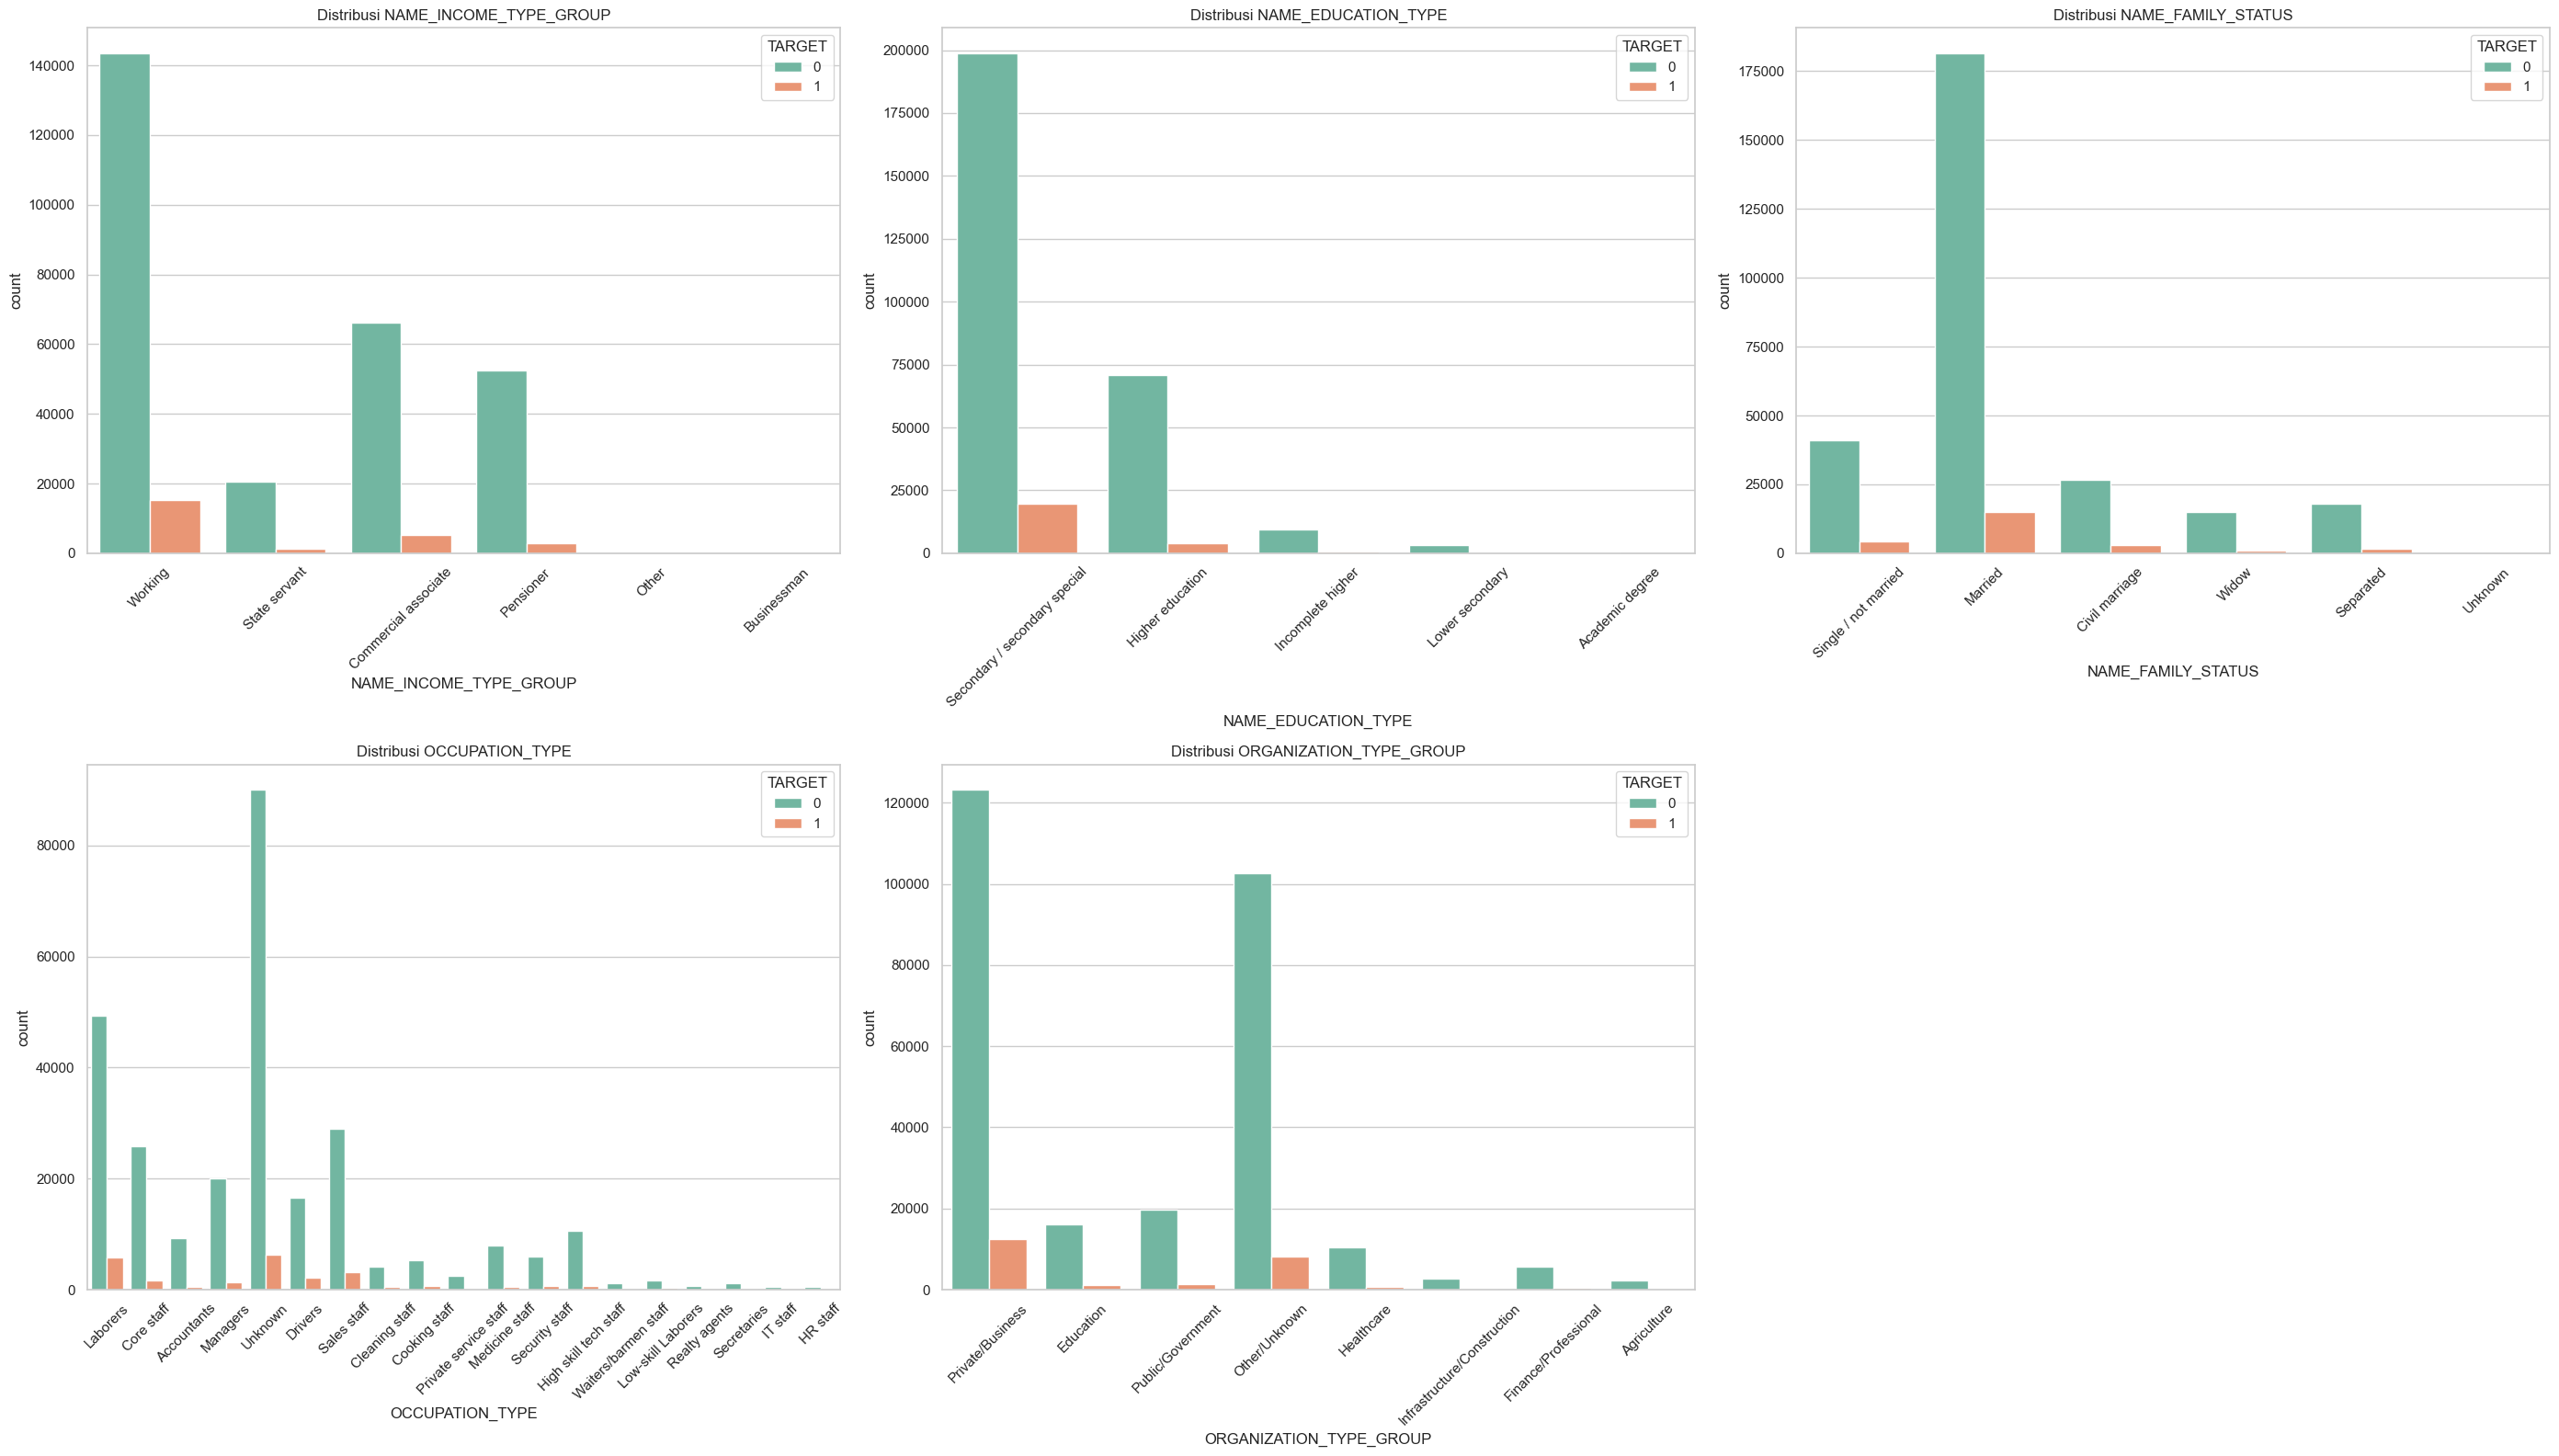

In [402]:
cols_group2 = ['NAME_INCOME_TYPE_GROUP', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE_GROUP']

fig, axes = plt.subplots(2, 3, figsize=(28, 16))
axes = axes.flatten()

for i, col in enumerate(cols_group2):
    ax = axes[i]
    sns.countplot(data=merged_df, x=col, hue='TARGET', ax=ax, palette='Set2')
    ax.set_title(f'Distribusi {col}')
    ax.tick_params(axis='x', rotation=45)

for j in range(len(cols_group2), len(axes.flatten())):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Analisis Bivariat

In [403]:
def scatter_plot_twovariables(col_x, col_y, limit_x=0, limit_y=0):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col_x, y=col_y, data=merged_df, 
                    alpha=0.3)
    plt.title(f'Hubungan Antara {col_x} dan {col_y}')
    plt.xlabel(col_x)
    plt.ylabel(col_y)

    if limit_x > 0:
        plt.xlim(0, limit_x)
    if limit_y > 0:
        plt.ylim(0, limit_y)
        
    plt.show()

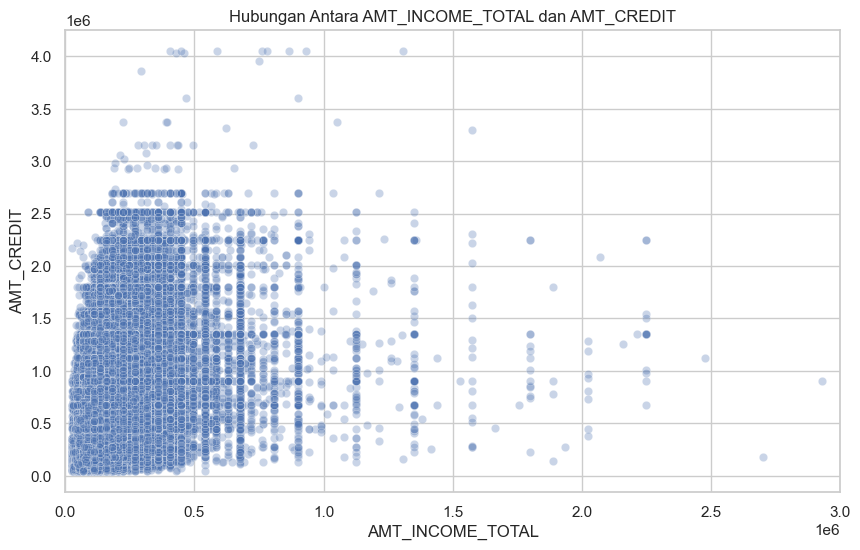

In [404]:
scatter_plot_twovariables('AMT_INCOME_TOTAL', 'AMT_CREDIT', limit_x=3000000)

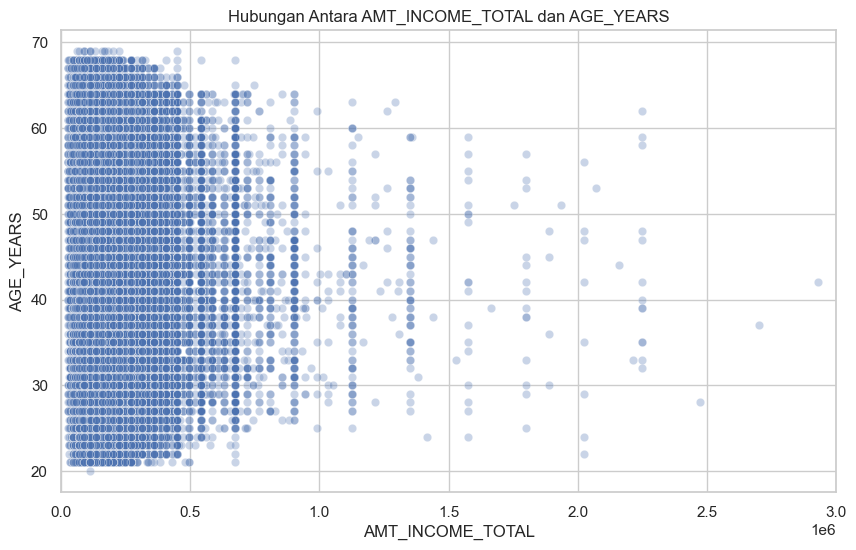

In [405]:
scatter_plot_twovariables('AMT_INCOME_TOTAL', 'AGE_YEARS', limit_x=3000000)

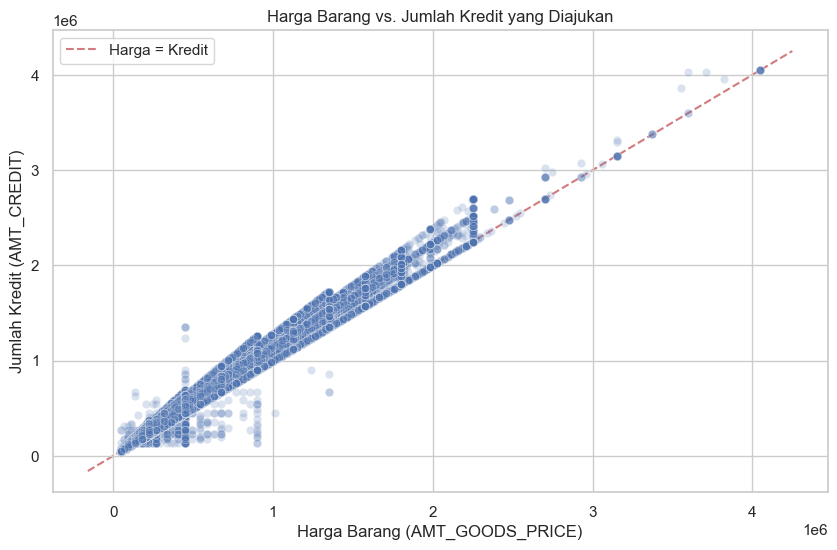

In [406]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=merged_df, 
                alpha=0.2)
plt.title('Harga Barang vs. Jumlah Kredit yang Diajukan')
plt.xlabel('Harga Barang (AMT_GOODS_PRICE)')
plt.ylabel('Jumlah Kredit (AMT_CREDIT)')

lims = [
    np.min([plt.xlim(), plt.ylim()]),
    np.max([plt.xlim(), plt.ylim()]),
]
plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Harga = Kredit')
plt.legend()
plt.show()

In [407]:
def boxplot_visualization(col_x, col_y):
    plt.figure(figsize=(12, 7))
    sns.boxplot(x=col_x, y=col_y, data=merged_df, hue=col_x, 
                palette='muted') 
    plt.title(f'Distribusi {col_y} berdasarkan {col_x}')
    plt.xlabel(f'{col_x}')
    plt.ylabel(f'{col_y}')
    plt.ylim(0, 2000000)
    plt.xticks(rotation=45)
    plt.show()

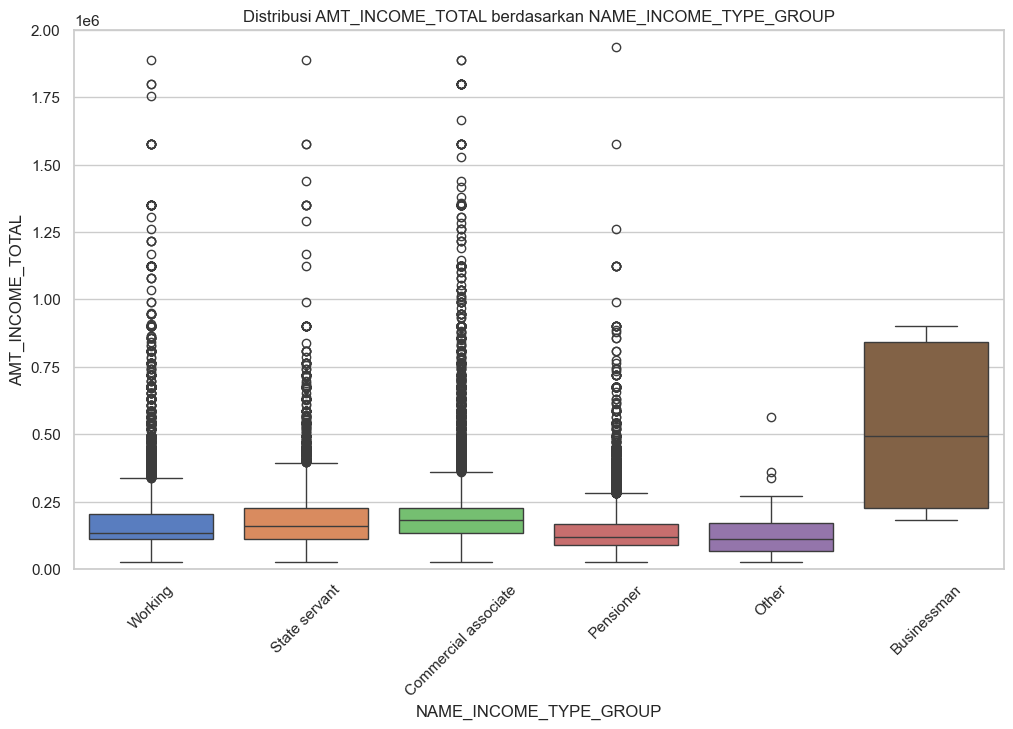

In [408]:
boxplot_visualization('NAME_INCOME_TYPE_GROUP', 'AMT_INCOME_TOTAL')

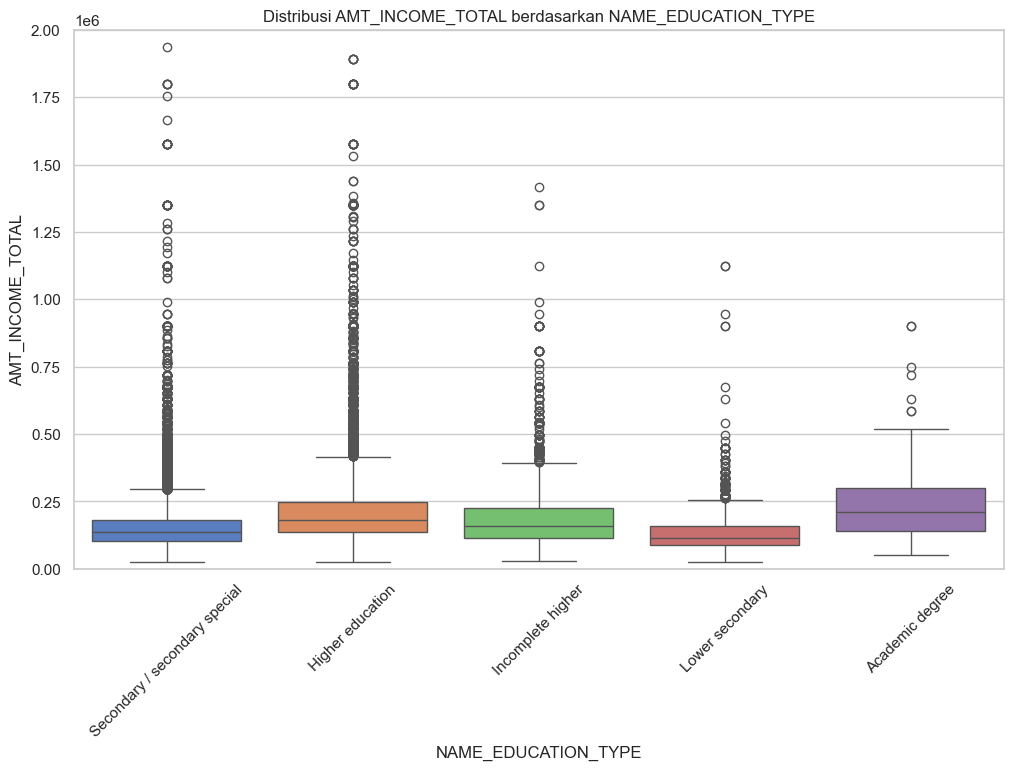

In [409]:
boxplot_visualization('NAME_EDUCATION_TYPE', 'AMT_INCOME_TOTAL')

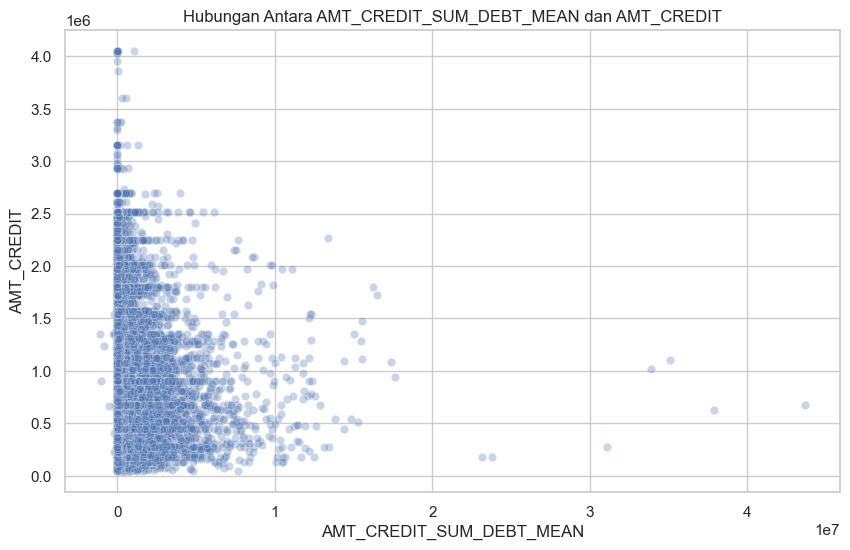

In [410]:
scatter_plot_twovariables('AMT_CREDIT_SUM_DEBT_MEAN', 'AMT_CREDIT')

#### Analisis Multivariat

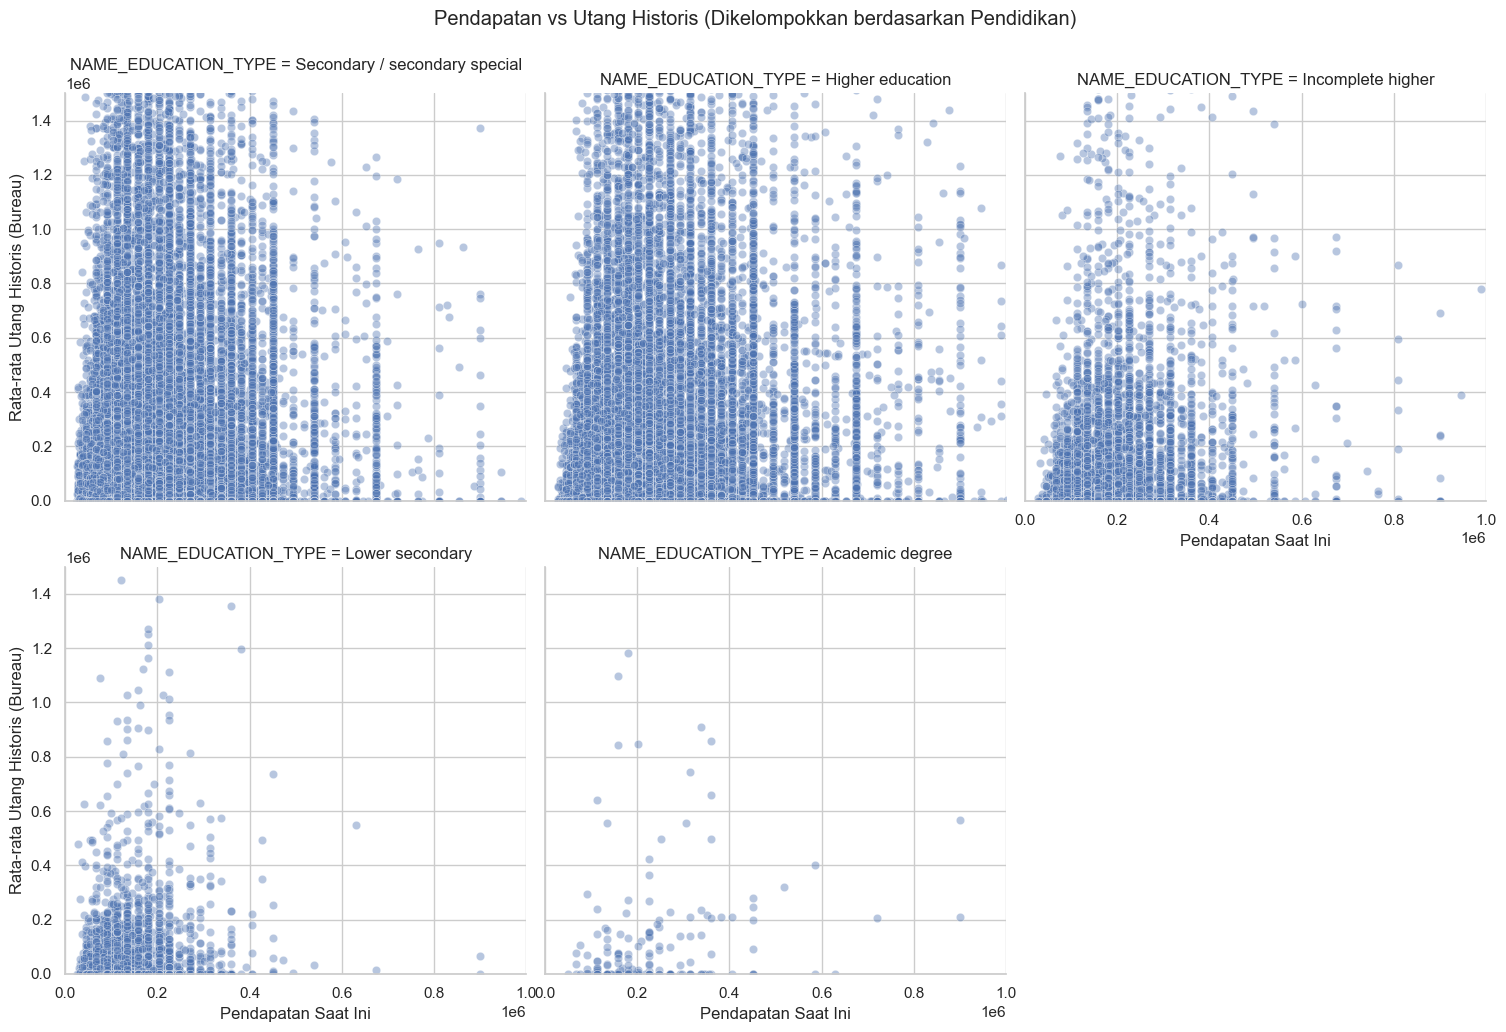

In [411]:
g = sns.relplot(
    data=merged_df,
    x='AMT_INCOME_TOTAL',
    y='AMT_CREDIT_SUM_DEBT_MEAN',
    col='NAME_EDUCATION_TYPE',
    col_wrap=3,
    alpha=0.4
)
g.set_axis_labels('Pendapatan Saat Ini', 'Rata-rata Utang Historis (Bureau)')
g.set(xlim=(0, 1000000), ylim=(-1000, 1500000))
plt.suptitle('Pendapatan vs Utang Historis (Dikelompokkan berdasarkan Pendidikan)', y=1.03)
plt.show()

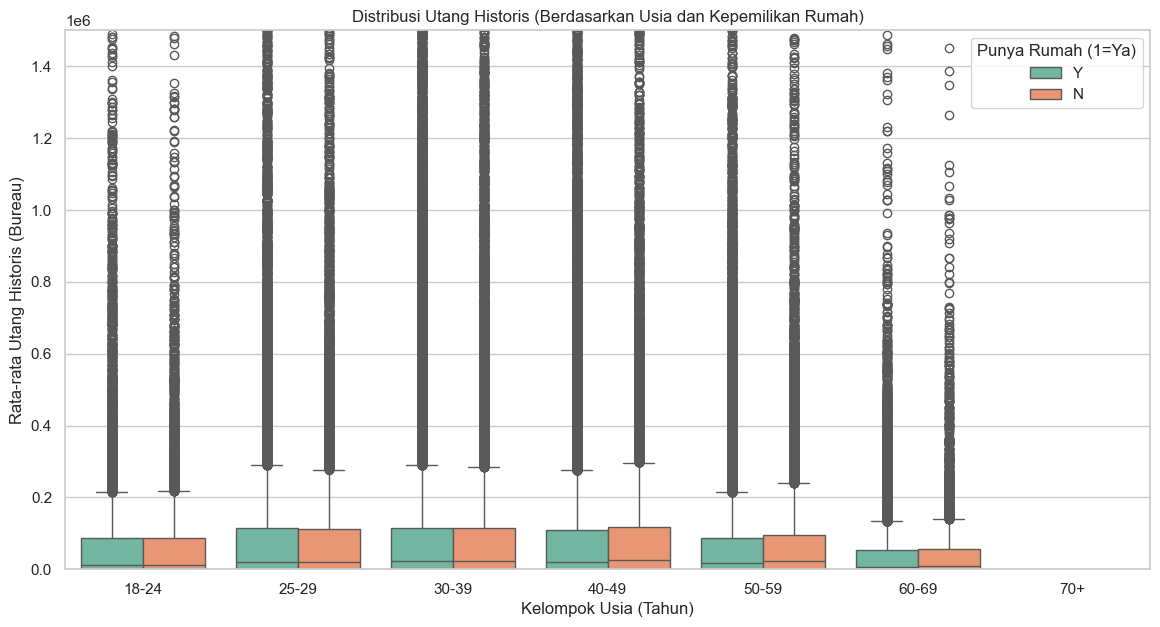

In [412]:
merged_df['AGE_YEARS_BINNED'] = pd.cut(merged_df['AGE_YEARS'], bins=[18, 25, 30, 40, 50, 60, 70, 100], labels=['18-24', '25-29', '30-39', '40-49', '50-59', '60-69', '70+'])

plt.figure(figsize=(14, 7))
sns.boxplot(
    data=merged_df,
    x='AGE_YEARS_BINNED',
    y='AMT_CREDIT_SUM_DEBT_MEAN',
    hue='FLAG_OWN_REALTY',
    palette='Set2'
)
plt.title('Distribusi Utang Historis (Berdasarkan Usia dan Kepemilikan Rumah)')
plt.xlabel('Kelompok Usia (Tahun)')
plt.ylabel('Rata-rata Utang Historis (Bureau)')
plt.ylim(0, 1500000)
plt.legend(title='Punya Rumah (1=Ya)')
plt.show()

#### Korelasi Antar Fitur

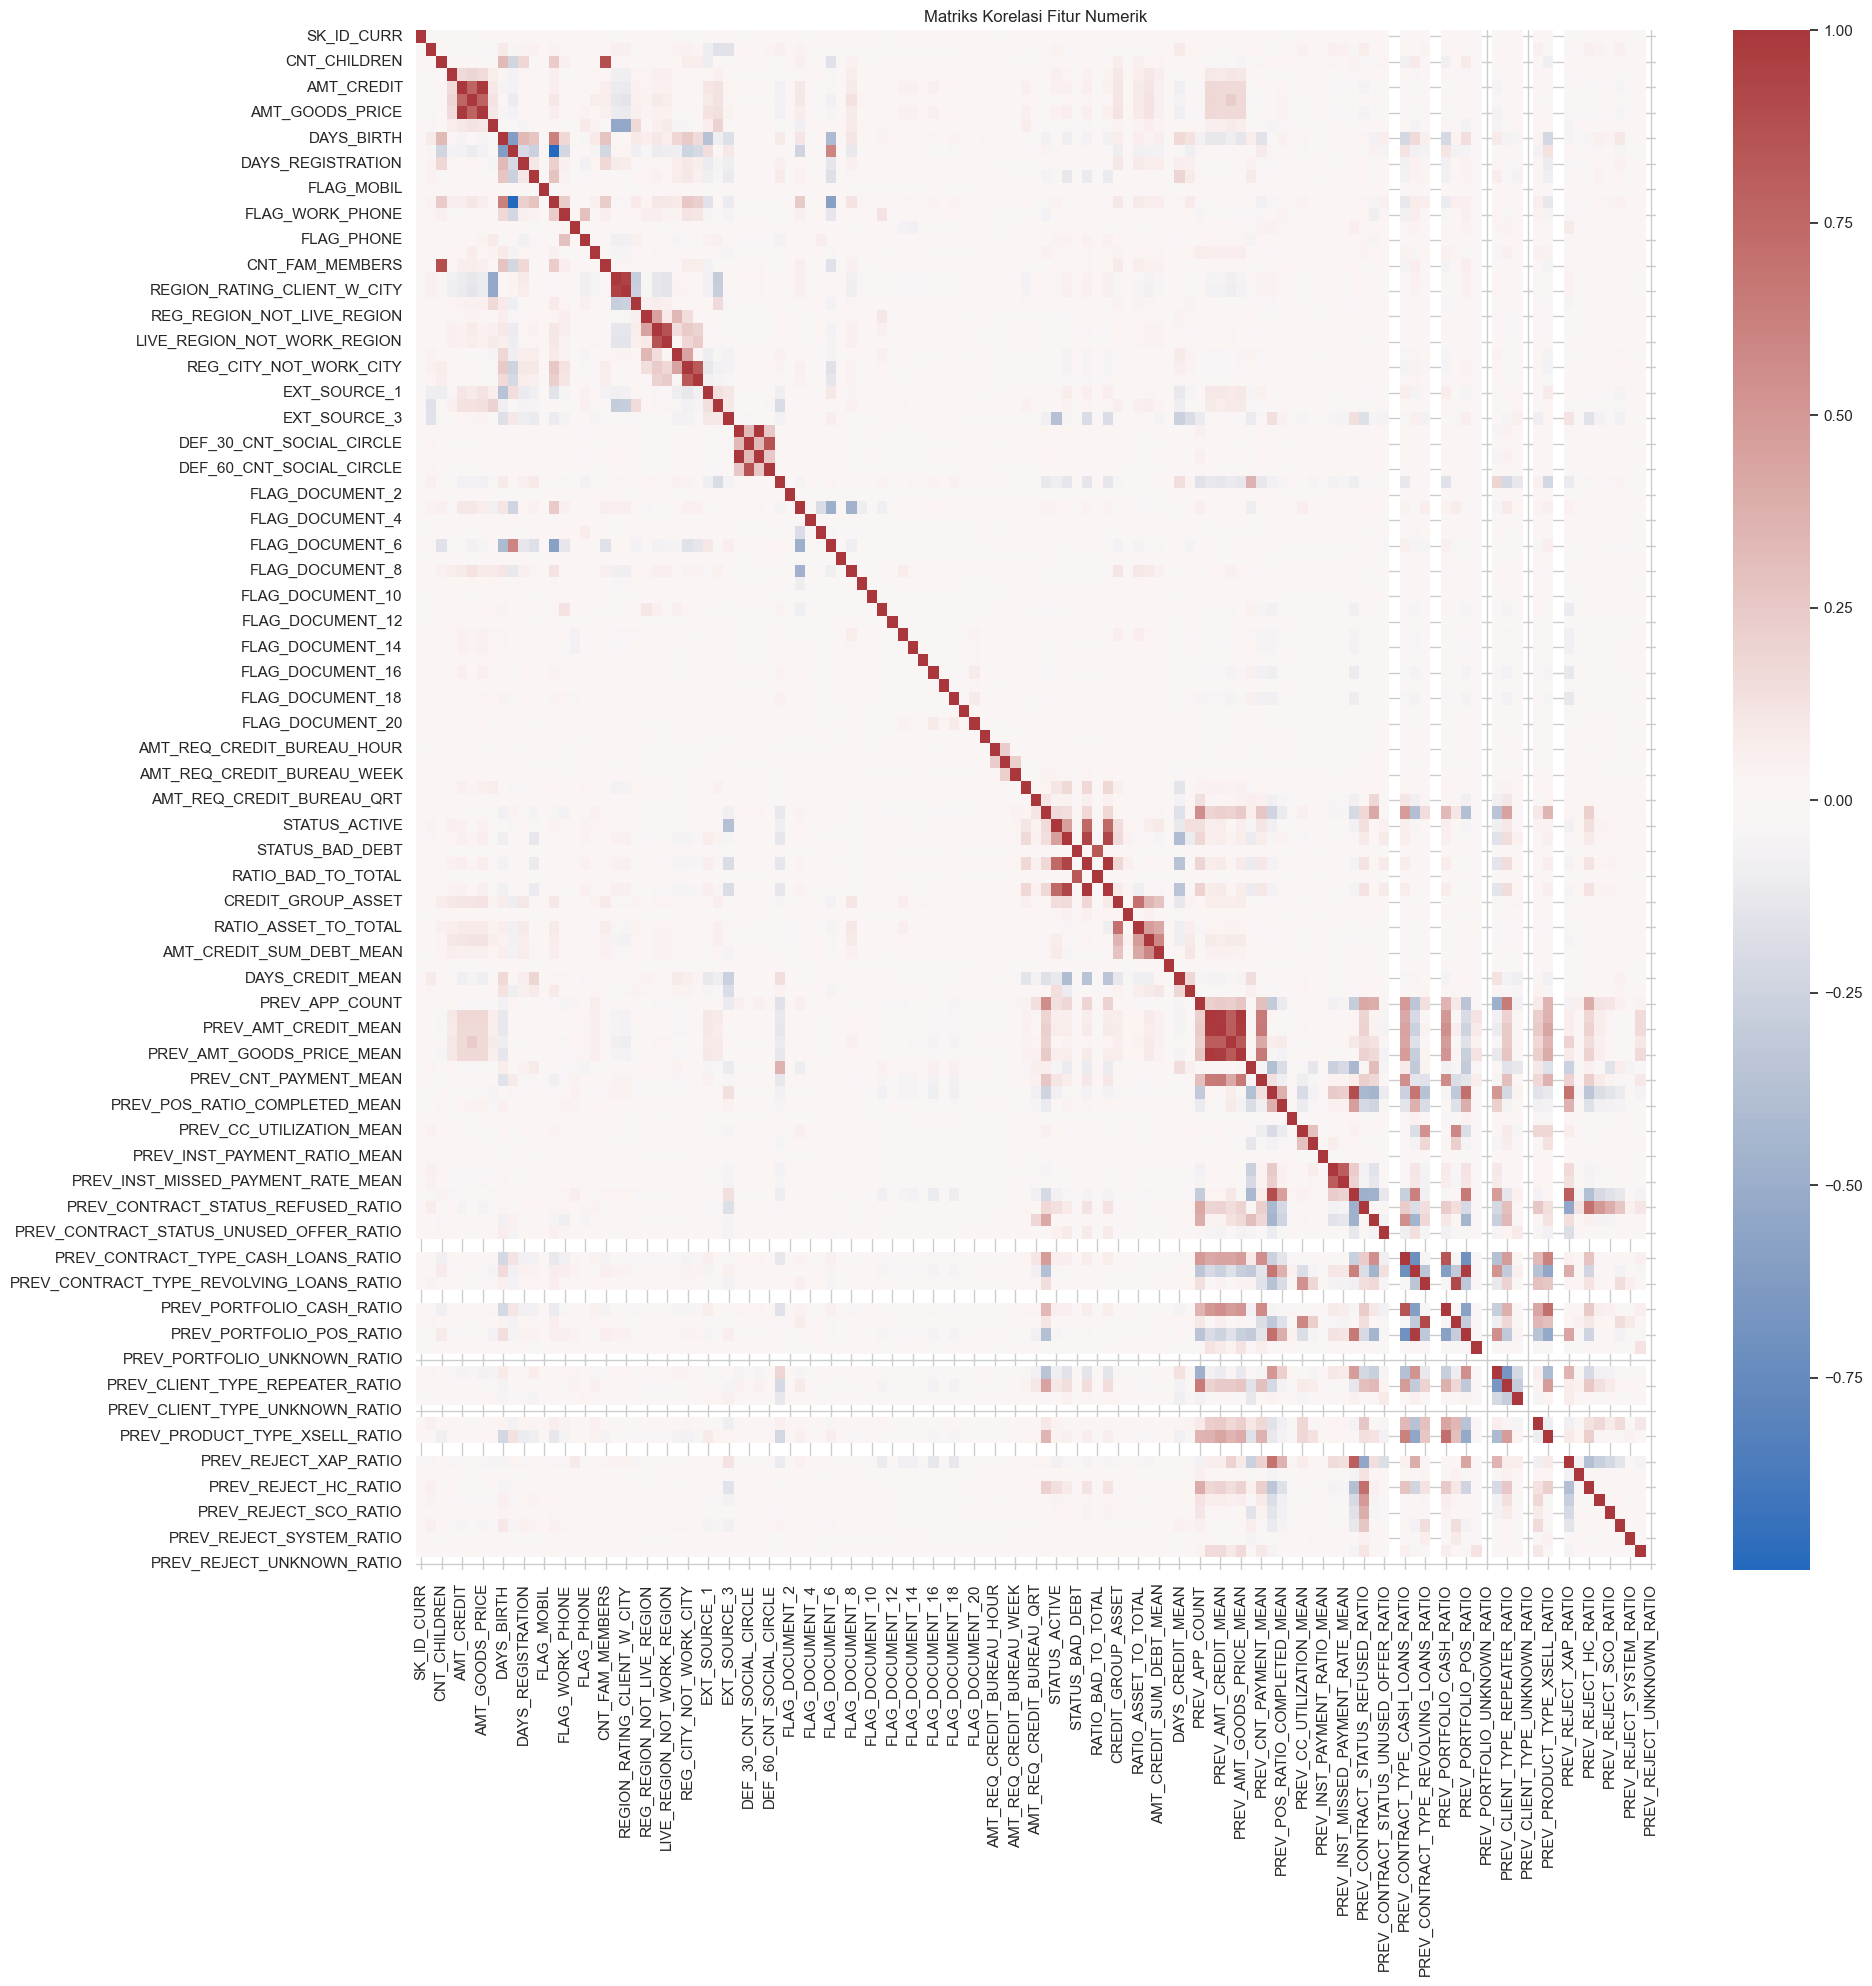

In [413]:
num_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
correlation = merged_df[num_cols].corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=False, cmap='vlag')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

In [414]:
corr_target = correlation['TARGET'].drop('TARGET').sort_values(ascending=False)
print('15 Fitur dengan Korelasi Positif Tertinggi terhadap TARGET:')
print(corr_target.head(15))

15 Fitur dengan Korelasi Positif Tertinggi terhadap TARGET:
DAYS_CREDIT_MEAN                      0.083960
DAYS_BIRTH                            0.078239
PREV_CONTRACT_STATUS_REFUSED_RATIO    0.077894
REGION_RATING_CLIENT_W_CITY           0.060893
REGION_RATING_CLIENT                  0.058899
PREV_PRODUCT_TYPE_WALKIN_RATIO        0.057810
PREV_REJECT_SCOFR_RATIO               0.055247
DAYS_LAST_PHONE_CHANGE                0.055218
PREV_INST_LATE_PAYMENT_RATIO_MEAN     0.055214
PREV_REJECT_HC_RATIO                  0.055027
PREV_CC_UTILIZATION_MEAN              0.054085
PREV_INST_MISSED_PAYMENT_RATE_MEAN    0.051725
DAYS_ID_PUBLISH                       0.051457
REG_CITY_NOT_WORK_CITY                0.050994
FLAG_EMP_PHONE                        0.045982
Name: TARGET, dtype: float64


In [415]:
print('15 Fitur dengan Korelasi Negatif Tertinggi terhadap TARGET:')
print(corr_target.tail(15).sort_values(ascending=True))

15 Fitur dengan Korelasi Negatif Tertinggi terhadap TARGET:
EXT_SOURCE_2                          -0.160295
EXT_SOURCE_3                          -0.155892
EXT_SOURCE_1                          -0.098887
DAYS_EMPLOYED                         -0.044932
PREV_POS_RATIO_ACTIVE_MEAN            -0.044802
PREV_CONTRACT_STATUS_APPROVED_RATIO   -0.041736
AMT_GOODS_PRICE                       -0.039623
STATUS_CLOSED                         -0.037233
REGION_POPULATION_RELATIVE            -0.037227
PREV_CONTRACT_STATUS_UNKNOWN_RATIO          NaN
PREV_CONTRACT_TYPE_UNKNOWN_RATIO            NaN
PREV_PORTFOLIO_UNKNOWN_RATIO                NaN
PREV_CLIENT_TYPE_UNKNOWN_RATIO              NaN
PREV_PRODUCT_TYPE_UNKNOWN_RATIO             NaN
PREV_REJECT_UNKNOWN_RATIO                   NaN
Name: TARGET, dtype: float64


In [416]:
print('Fitur-Fitur dengan Korelasi Absolut Tertinggi terhadap sesama Independen Variable:')
abs_correlation = correlation.abs().drop('TARGET', axis=0).drop('TARGET', axis=1)

mask = np.triu(np.ones(abs_correlation.shape, dtype=bool), k=1)
upper = abs_correlation.where(mask)

top_pairs = (
    upper.stack()
         .dropna()
         .sort_values(ascending=False)
)

TOP_N = 60
print(top_pairs.head(TOP_N).to_frame('abs_corr'))

top_features = pd.Index(
    top_pairs.head(TOP_N).index.get_level_values(0).tolist() +
    top_pairs.head(TOP_N).index.get_level_values(1).tolist()
).unique()

Fitur-Fitur dengan Korelasi Absolut Tertinggi terhadap sesama Independen Variable:
                                                                                  abs_corr
DAYS_EMPLOYED                            FLAG_EMP_PHONE                           0.999755
OBS_30_CNT_SOCIAL_CIRCLE                 OBS_60_CNT_SOCIAL_CIRCLE                 0.998491
TOTAL_CREDITS                            CREDIT_GROUP_RETAIL                      0.995309
PREV_AMT_APPLICATION_MEAN                PREV_AMT_GOODS_PRICE_MEAN                0.988892
AMT_CREDIT                               AMT_GOODS_PRICE                          0.986734
PREV_AMT_APPLICATION_MEAN                PREV_AMT_CREDIT_MEAN                     0.977106
PREV_CONTRACT_TYPE_CONSUMER_LOANS_RATIO  PREV_PORTFOLIO_POS_RATIO                 0.976110
PREV_AMT_CREDIT_MEAN                     PREV_AMT_GOODS_PRICE_MEAN                0.975958
REGION_RATING_CLIENT                     REGION_RATING_CLIENT_W_CITY              0.950842
STATUS_

### Explanatory Data Analysis (Menjawab Pertanyaan Bisnis)

In [417]:
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [418]:
def anomaly_summary(df):
    out = {}
    if "DAYS_EMPLOYED" in df.columns:
        out["DAYS_EMPLOYED == 365243"] = int((df["DAYS_EMPLOYED"] == 365243).sum())
    for col in ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]:
        if col in df.columns:
            out[f"{col} <= 0"] = int((df[col] <= 0).sum())
    if set(["AMT_CREDIT", "AMT_INCOME_TOTAL"]).issubset(df.columns):
        dti = df["AMT_CREDIT"] / df["AMT_INCOME_TOTAL"].replace(0, np.nan)
        out["DTI > 10 (leverage sangat tinggi)"] = int((dti > 10).sum())
        out["DTI is inf/NaN"] = int(dti.isna().sum() + np.isinf(dti).sum())
    if set(["AMT_ANNUITY", "AMT_INCOME_TOTAL"]).issubset(df.columns):
        burden = df["AMT_ANNUITY"] / df["AMT_INCOME_TOTAL"].replace(0, np.nan)
        out["Payment burden > 0.8"] = int((burden > 0.8).sum())
        out["Payment burden is inf/NaN"] = int(burden.isna().sum() + np.isinf(burden).sum())
    return (
        pd.DataFrame({"anomaly": list(out.keys()), "count": list(out.values())})
        .sort_values("count", ascending=False)
        .reset_index(drop=True)
    )

def compare_means(df, feature, target_col="TARGET"):
    print(f"\n--- Analisis Komparatif untuk: {feature} ---")
    stats = df.groupby(target_col)[feature].agg(['mean', 'median', 'min', 'max','count'])
    return stats

def plot_risk_comparison(df, feature, title, target_col="TARGET",
                         min_bin_count=200, top_n=30, sort_by="default_rate",
                         rotate_xticks=30):
    tmp = df[[feature, target_col]].replace([np.inf, -np.inf], np.nan).dropna().copy()
    if tmp.empty:
        print(f"[INFO] Tidak ada data non-null untuk {feature}.")
        return

    g = (
        tmp.groupby(feature, dropna=False)[target_col]
        .agg(["mean", "count"])
        .reset_index()
        .rename(columns={"mean": "default_rate", "count": "n"})
    )

    g = g[g["n"] >= min_bin_count].copy()
    if g.empty:
        print(f"[INFO] Semua kategori/bin untuk {feature} memiliki n < {min_bin_count}.")
        return

    if sort_by == "n":
        g = g.sort_values(["n", "default_rate"], ascending=[False, False])
    else:
        g = g.sort_values(["default_rate", "n"], ascending=[False, False])

    if top_n is not None:
        g = g.head(top_n)

    x = np.arange(len(g))
    y = g["default_rate"] * 100

    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax2 = ax1.twinx()

    ax1.bar(x, g["n"], color="#a7f3d0", alpha=0.9, label="Jumlah (n)")
    ax2.plot(x, y, color="#f97316", marker="o", linewidth=2.2, label="Default Rate (%)")

    # label % di atas titik
    for xi, yi in zip(x, y):
        ax2.annotate(
            f"{yi:.1f}%",
            (xi, yi),
            textcoords="offset points",
            xytext=(0, 8),
            ha="center",
            va="bottom",
            fontsize=9,
            color="#f97316"
        )

    ax1.set_xticks(x)
    ax1.set_xticklabels(g[feature].astype(str), rotation=rotate_xticks, ha="right")
    ax1.set_ylabel("Jumlah (n)")
    ax2.set_ylabel("Default Rate (%)")
    ax2.set_ylim(0, max(5, y.max() * 1.2))
    ax1.set_title(title)
    ax1.grid(axis="y", alpha=0.25)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="upper right")

    plt.tight_layout()
    plt.show()

In [419]:
def plot_binary_reason_risk(
    df, cols, labels, title, positive_label, target_col="TARGET", min_count=200
 ):
    rows = []
    for col, label in zip(cols, labels):
        if col not in df.columns:
            continue
        s = df[col].astype("object")
        mask = s == positive_label
        n = int(mask.sum())
        if n == 0:
            rows.append({"label": label, "n": 0, "default_rate": np.nan})
            continue
        dr = float(df.loc[mask, target_col].mean())
        rows.append({"label": label, "n": n, "default_rate": dr})

    res = pd.DataFrame(rows).dropna(subset=["default_rate"]).copy()
    res = res[res["n"] >= min_count].sort_values(["default_rate", "n"], ascending=[False, False])
    display(res)
    if res.empty:
        print(f"[INFO] Tidak ada reason dengan n >= {min_count}")
        return

    x = np.arange(len(res))
    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax2 = ax1.twinx()

    ax1.bar(x, res["n"], color="#c7d2fe", alpha=0.9, label="Jumlah (positif)")
    ax2.plot(x, res["default_rate"] * 100, color="#dc2626", marker="o", linewidth=2.2, label="Default Rate (%)")

    y = res["default_rate"] * 100
    for xi, yi in zip(x, y):
        ax2.annotate(
            f"{yi:.1f}%",
            (xi, yi),
            textcoords="offset points",
            xytext=(0, 8),
            ha="center",
            va="bottom",
            fontsize=9,
            color="#dc2626"
        )

    ax1.set_xticks(x)
    ax1.set_xticklabels(res["label"], rotation=30, ha="right")
    ax1.set_ylabel("Jumlah (n)")
    ax2.set_ylabel("Default Rate (%)")
    ax2.set_ylim(0, max(5, (res["default_rate"] * 100).max() * 1.2))
    ax1.set_title(title)
    ax1.grid(axis="y", alpha=0.25)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="upper right")

    plt.tight_layout()
    plt.show()

#### Q1 — Apakah ada anomali pada data yang perlu diwaspadai?

In [420]:
display(anomaly_summary(merged_df))

if "DAYS_EMPLOYED" in merged_df.columns:
    sentinel_rate = (merged_df["DAYS_EMPLOYED"] == 365243).mean() * 100
    print(f"Proporsi DAYS_EMPLOYED (365243): {sentinel_rate:.2f}%")

,anomaly,count
0,DAYS_EMPLOYED == 365243,55374
1,DTI > 10 (leverage sangat tinggi),9844
2,Payment burden > 0.8,174
3,AMT_INCOME_TOTAL <= 0,0
4,AMT_CREDIT <= 0,0
5,AMT_ANNUITY <= 0,0
6,AMT_GOODS_PRICE <= 0,0
7,DTI is inf/NaN,0
8,Payment burden is inf/NaN,0


Proporsi DAYS_EMPLOYED (365243): 18.01%


- Untuk DAYS_EMPLOYED == 365243, akan diganti menjadi 0 (karena menandakan tidak bekerja)
- Terdapat sedikit data yang rasio Debt-to-Income nya sangat tinggi (9844 data) 
- Terdapat data yang Payment Burden lebih dari 0.8 (174 data)

#### Q2 — Siapa segmen nasabah paling berisiko?

Pengelompokan Umur

In [421]:
merged_df['AGE_BIN'] = pd.cut(merged_df['AGE_YEARS'], bins=[18, 25, 35, 45, 55, 100], labels=['18-24', '25-35', '35-45', '45-55', '55+'])
compare_means(merged_df, 'AGE_YEARS')


--- Analisis Komparatif untuk: AGE_YEARS ---


,mean,median,min,max,count
TARGET,,,,,
0,43.713123,43.0,20,69,282686
1,40.279960,39.0,21,68,24825


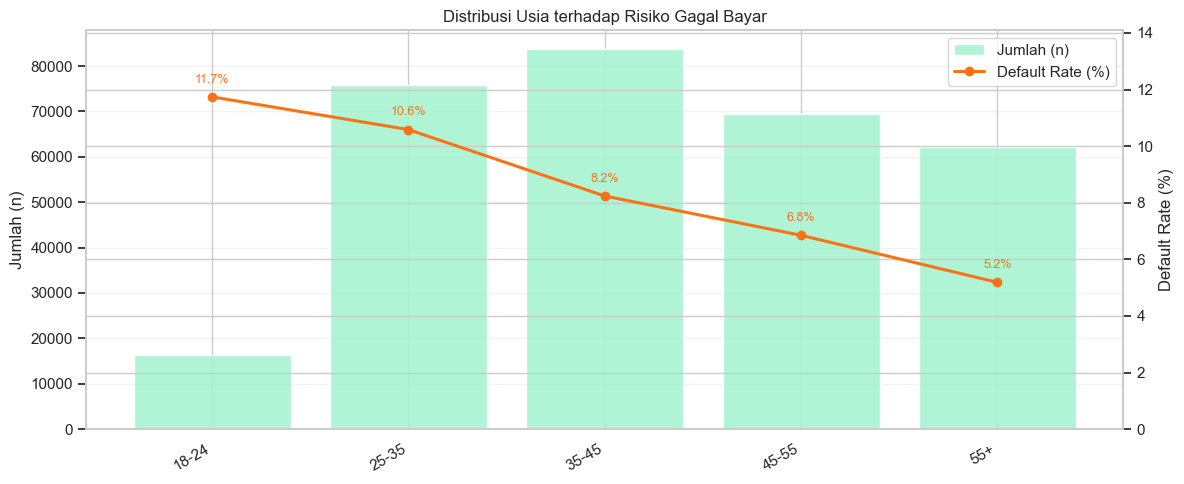

In [422]:
plot_risk_comparison(merged_df, 'AGE_BIN', 'Distribusi Usia terhadap Risiko Gagal Bayar')

Pengelompokan lama tahun bekerja

In [423]:
merged_df['DAYS_EMPLOYED'] = merged_df['DAYS_EMPLOYED'].replace(365243, np.nan)
merged_df['YEARS_EMPLOYED'] = -merged_df['DAYS_EMPLOYED'] / 365

In [424]:
merged_df['YEARS_EMPLOYED_BIN'] = pd.cut(merged_df['YEARS_EMPLOYED'], bins=[0, 2, 5, 10, 50], labels=['0-2', '2-5', '5-10', '10+'])
compare_means(merged_df, 'YEARS_EMPLOYED')


--- Analisis Komparatif untuk: YEARS_EMPLOYED ---


,mean,median,min,max,count
TARGET,,,,,
0,6.679836,4.632877,-0.0,49.073973,230302
1,4.972380,3.369863,-0.0,44.024658,21835


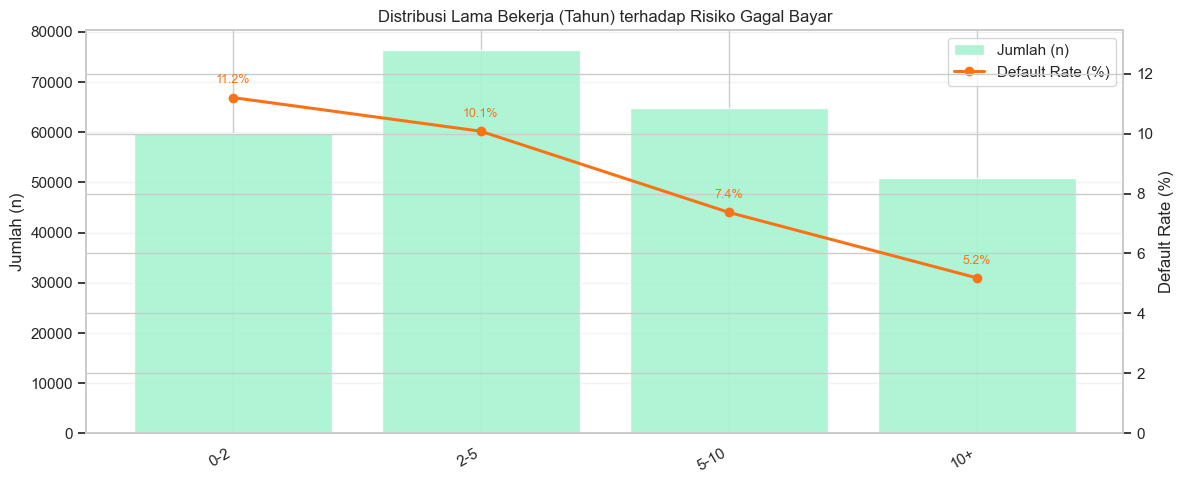

In [471]:
plot_risk_comparison(merged_df, 'YEARS_EMPLOYED_BIN', 'Distribusi Lama Bekerja (Tahun) terhadap Risiko Gagal Bayar')

Pengelompokan waktu terakhir penggantian nomor telepon & Domisili tidak tetap

In [426]:
merged_df['DAYS_LAST_PHONE_CHANGE'] = -merged_df['DAYS_LAST_PHONE_CHANGE']

In [427]:
merged_df['DAYS_LAST_PHONE_CHANGE_BIN'] = pd.cut(merged_df['DAYS_LAST_PHONE_CHANGE'], bins=[0, 100, 500, 1000, 5000, 10000], labels=['0-100', '100-500', '500-1000', '1000-5000', '5000+'])

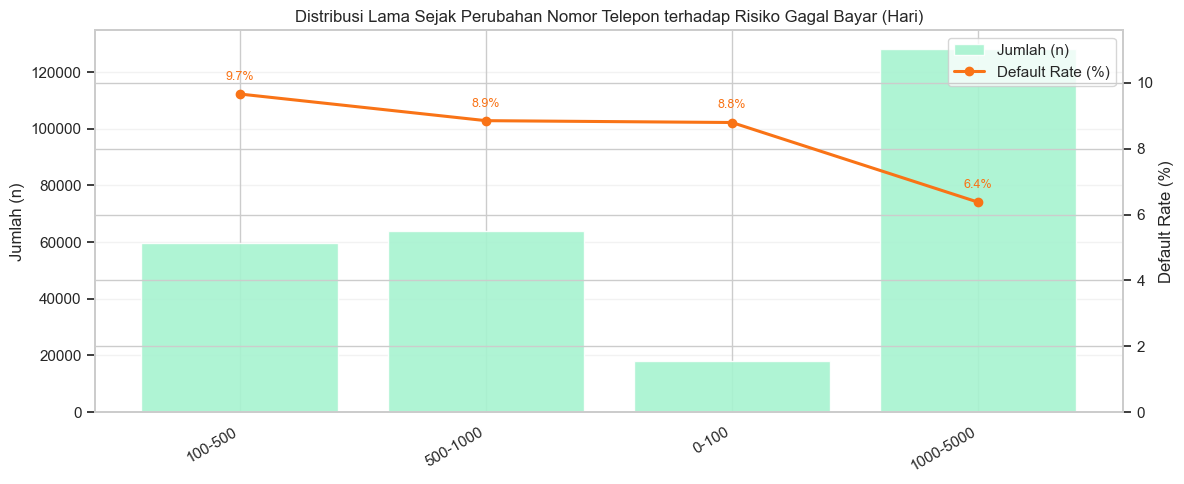

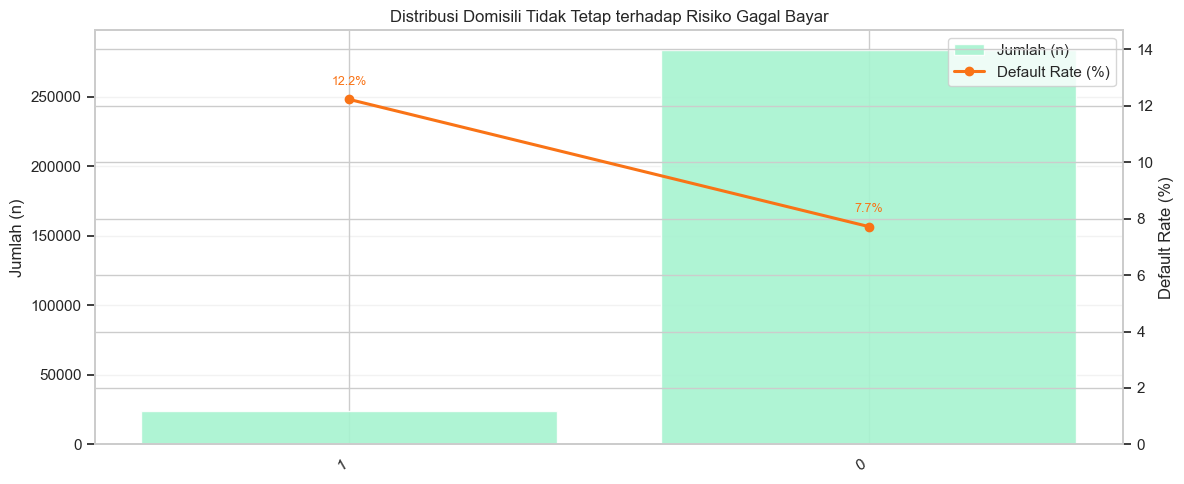

In [472]:
plot_risk_comparison(merged_df, 'DAYS_LAST_PHONE_CHANGE_BIN', 'Distribusi Lama Sejak Perubahan Nomor Telepon terhadap Risiko Gagal Bayar (Hari)')
plot_risk_comparison(merged_df, 'REG_CITY_NOT_LIVE_CITY', 'Distribusi Domisili Tidak Tetap terhadap Risiko Gagal Bayar')

Pengelompokan jumlah anak & jumlah anggota keluarga

In [429]:
merged_df['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [430]:
merged_df['CNT_CHILDREN_BINNED'] = pd.cut(merged_df['CNT_CHILDREN'], bins=[-1, 0, 1, 2, 3, 10], labels=['0', '1', '2', '3', '4+'])
merged_df['CNT_FAM_MEMBERS_BINNED'] = pd.cut(merged_df['CNT_FAM_MEMBERS'], bins=[0, 1, 2, 3, 4, 20], labels=['1', '2', '3', '4', '5+'])

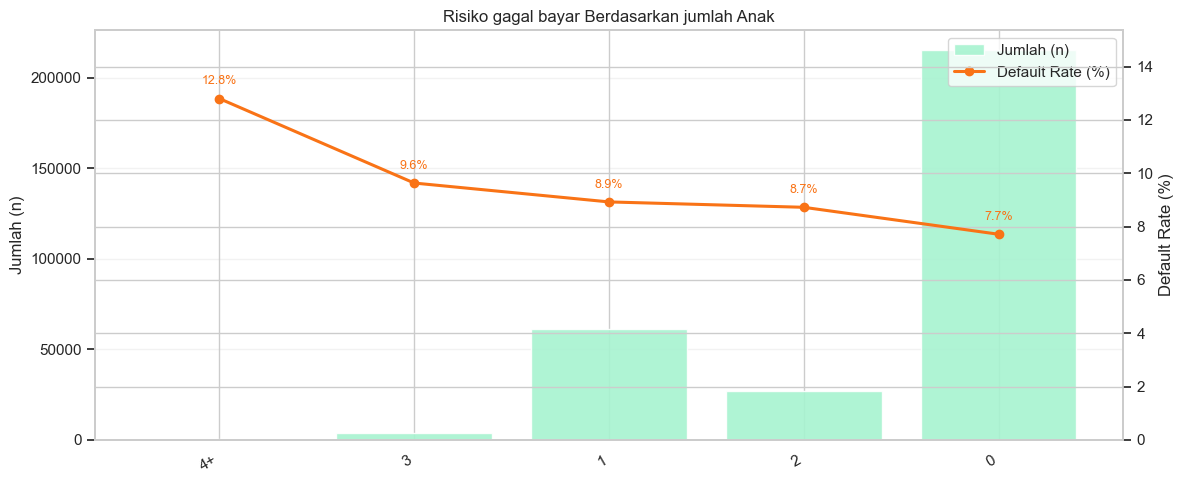

In [431]:
plot_risk_comparison(merged_df, 'CNT_CHILDREN_BINNED', 'Risiko gagal bayar Berdasarkan jumlah Anak')

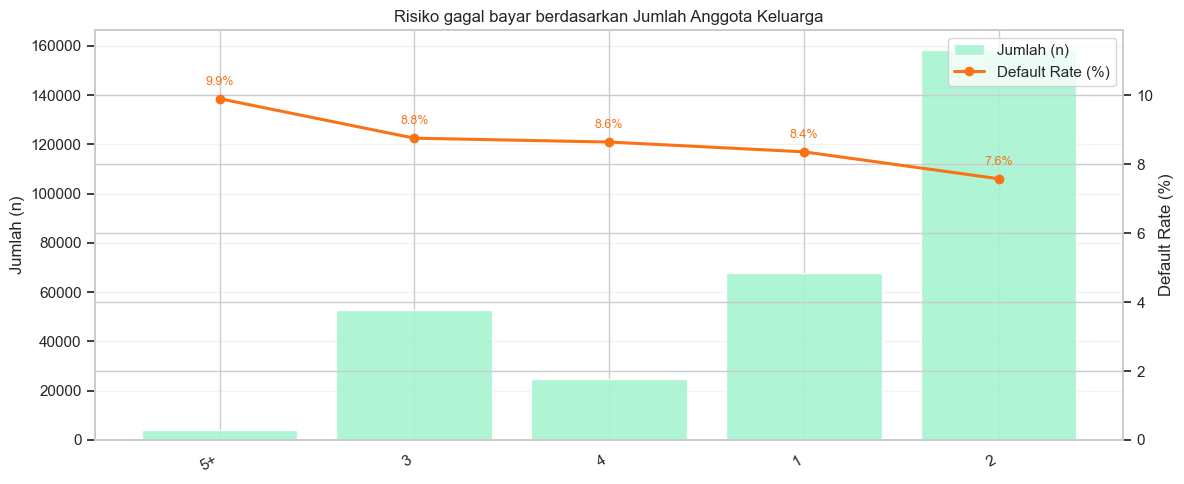

In [432]:
plot_risk_comparison(merged_df, 'CNT_FAM_MEMBERS_BINNED', 'Risiko gagal bayar berdasarkan Jumlah Anggota Keluarga')

Kepemilikan Properti & Mobil

In [433]:
merged_df['FLAG_OWN_CAR_MAP'] = merged_df['FLAG_OWN_CAR'].map({'N': 'Tidak Punya Mobil', 'Y': 'Punya Mobil'})
merged_df['FLAG_OWN_REALTY_MAP'] = merged_df['FLAG_OWN_REALTY'].map({'N': 'Tidak Punya Properti', 'Y': 'Punya Properti'})

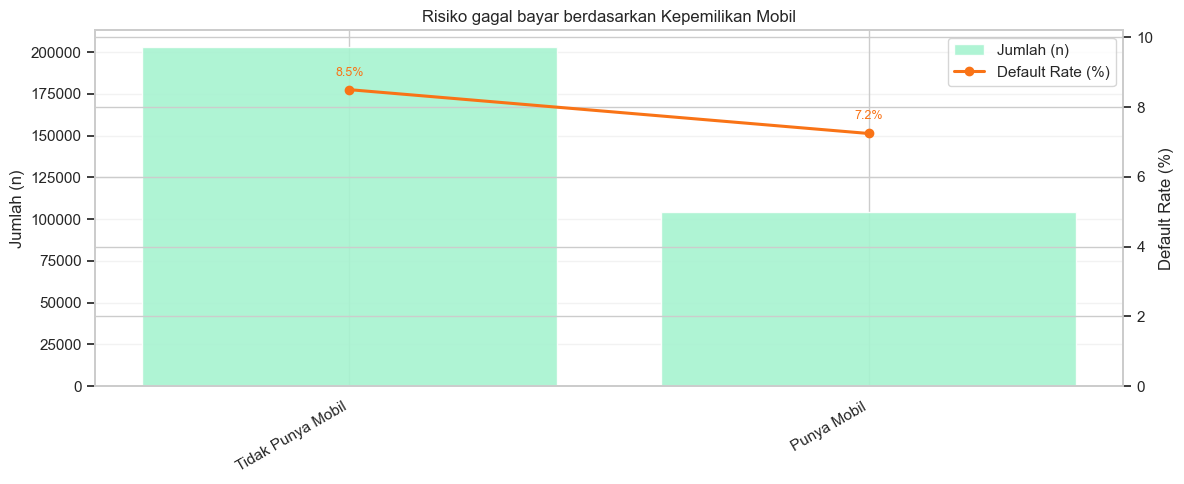

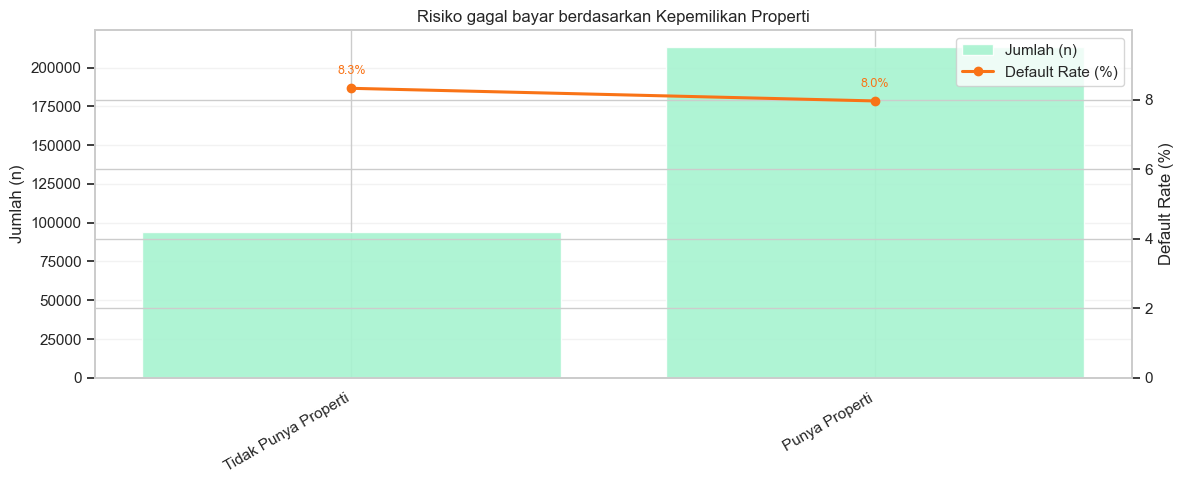

In [434]:
plot_risk_comparison(merged_df, 'FLAG_OWN_CAR_MAP', 'Risiko gagal bayar berdasarkan Kepemilikan Mobil')
plot_risk_comparison(merged_df, 'FLAG_OWN_REALTY_MAP', 'Risiko gagal bayar berdasarkan Kepemilikan Properti')

Berdasarkan status pelanggan baru/tidak dan telah beberapa kali melakukan pengajuan kredit/belum sama sekali

In [435]:
merged_df['PREV_CLIENT_TYPE_REFRESHED_BINNED'] = pd.cut(
    merged_df['PREV_CLIENT_TYPE_REFRESHED_RATIO'],
    bins=[-1, 0, 1],
    labels=['Not Refreshed', 'Refreshed']
)
merged_df['PREV_CLIENT_TYPE_REFRESHED_BINNED'].value_counts()

PREV_CLIENT_TYPE_REFRESHED_BINNED
Not Refreshed    230806
Refreshed         76705
Name: count, dtype: int64

In [436]:
merged_df['PREV_CLIENT_TYPE_REPEATER_BINNED'] = pd.cut(
    merged_df['PREV_CLIENT_TYPE_REPEATER_RATIO'],
    bins=[-1, 0, 1],
    labels=['Non-Repeater', 'Repeater']
)
merged_df['PREV_CLIENT_TYPE_REPEATER_BINNED'].value_counts()

PREV_CLIENT_TYPE_REPEATER_BINNED
Repeater        220610
Non-Repeater     86901
Name: count, dtype: int64

In [437]:
pivot_repeater_refreshed = merged_df.groupby(
    ['PREV_CLIENT_TYPE_REPEATER_BINNED', 'PREV_CLIENT_TYPE_REFRESHED_BINNED']
)['TARGET'].mean().reset_index()

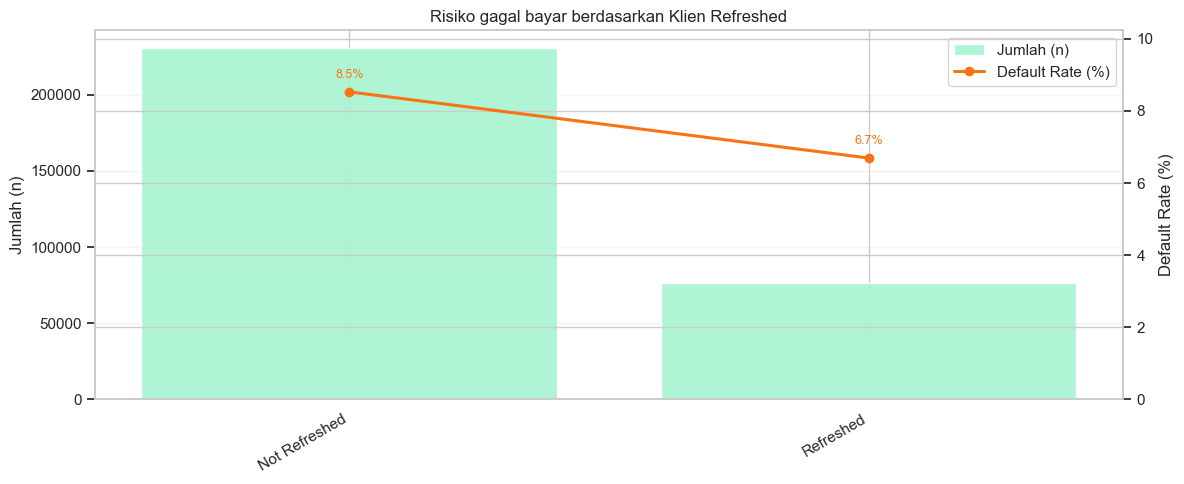

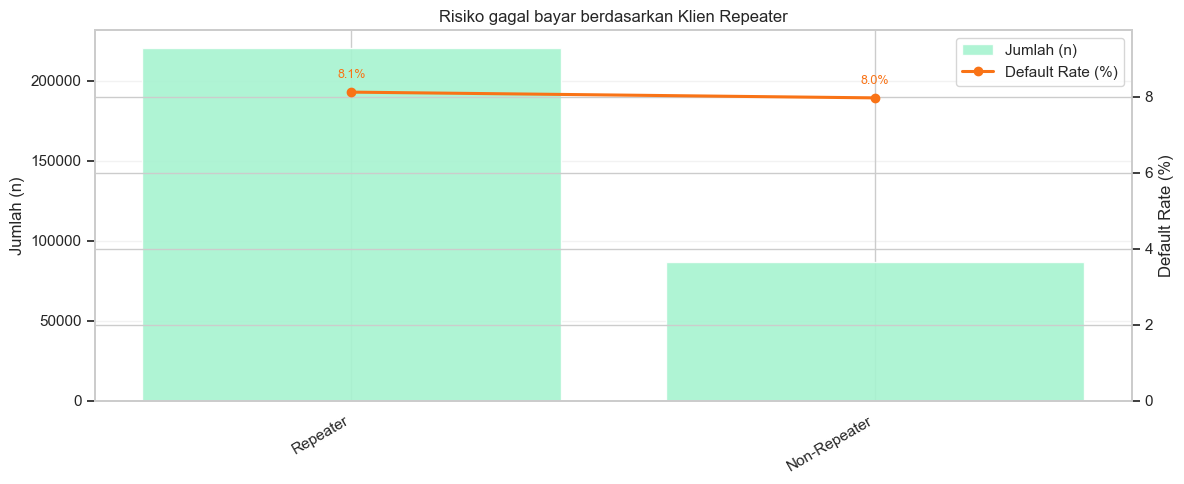

In [438]:
plot_risk_comparison(merged_df, 'PREV_CLIENT_TYPE_REFRESHED_BINNED', 'Risiko gagal bayar berdasarkan Klien Refreshed')
plot_risk_comparison(merged_df, 'PREV_CLIENT_TYPE_REPEATER_BINNED', 'Risiko gagal bayar berdasarkan Klien Repeater')

Berdasarkan alasan rejectnya

In [439]:
list_cols_code_reject = [
    'PREV_REJECT_HC_RATIO',
    'PREV_REJECT_LIMIT_RATIO',
    'PREV_REJECT_SCO_RATIO',
    'PREV_REJECT_SCOFR_RATIO',
    'PREV_REJECT_SYSTEM_RATIO',
    'PREV_REJECT_VERIF_RATIO',
    'PREV_REJECT_XAP_RATIO',
    'PREV_REJECT_XNA_RATIO',
]

for col in list_cols_code_reject:
    merged_df[col + '_Binned'] = pd.cut(
        merged_df[col],
        bins=[-1, 0, 1],
        labels=['Not The Reason', 'Rejected for This Reason']
    )

,label,n,default_rate
3,SCOFR,6788,0.194903
1,LIMIT,28388,0.118677
0,HC,66029,0.105847
7,XNA,3656,0.099289
2,SCO,21652,0.098882
5,VERIF,2519,0.098452
6,XAP,290450,0.081894
4,SYSTEM,514,0.071984


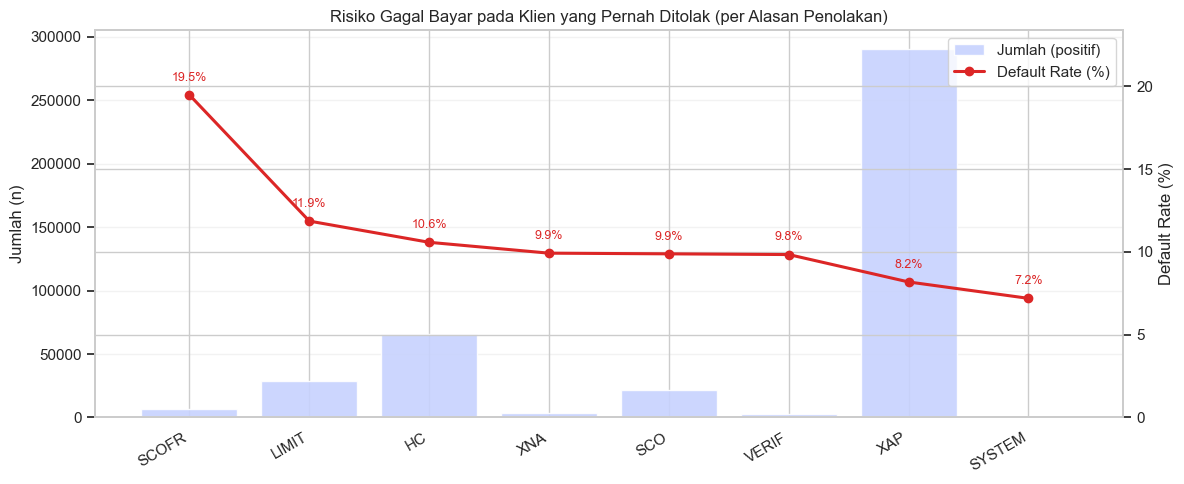

In [440]:
plot_binary_reason_risk(
    merged_df,
    cols=[c + "_Binned" for c in list_cols_code_reject],
    labels=["HC", "LIMIT", "SCO", "SCOFR", "SYSTEM", "VERIF", "XAP", "XNA"],
    title="Risiko Gagal Bayar pada Klien yang Pernah Ditolak (per Alasan Penolakan)",
    positive_label="Rejected for This Reason",
    min_count=200
 )

Berdasarkan status penolakan kontrak sebelumnya

In [441]:
merged_df['PREV_CONTRACT_STATUS_REFUSED_BINNED'] = pd.cut(
    merged_df['PREV_CONTRACT_STATUS_REFUSED_RATIO'],
    bins=[-1, 0, 1],
    labels=['Not Refused', 'Refused']
)

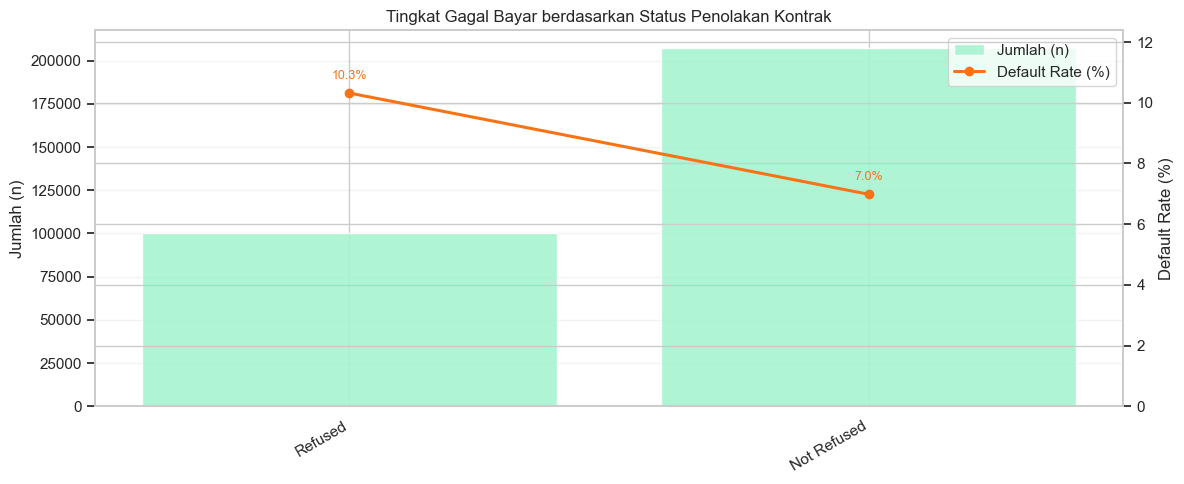

In [442]:
plot_risk_comparison(merged_df, 'PREV_CONTRACT_STATUS_REFUSED_BINNED', 'Tingkat Gagal Bayar berdasarkan Status Penolakan Kontrak')

#### Q3 — Apa faktor keuangan utama yang memicu gagal bayar?

In [444]:
merged_df['DTI'] = merged_df['AMT_CREDIT'] / merged_df['AMT_INCOME_TOTAL']
merged_df['PAYMENT_RATIO'] = merged_df['AMT_ANNUITY'] / merged_df['AMT_INCOME_TOTAL']

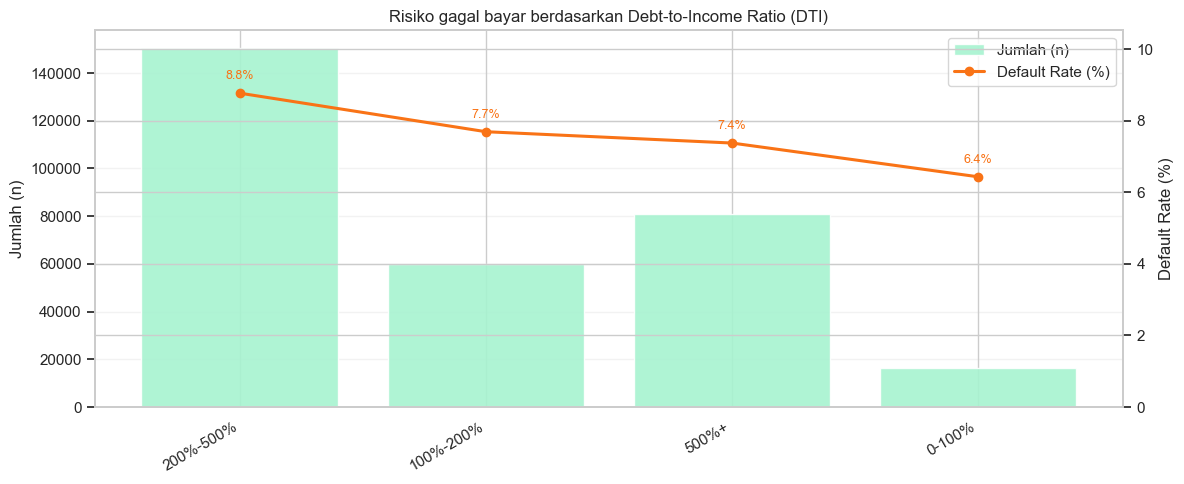

In [445]:
merged_df['DTI_BINNING'] = pd.cut(merged_df['DTI'], bins=[0, 1, 2, 5, 100], labels=['0-100%', '100%-200%', '200%-500%', '500%+'])
plot_risk_comparison(merged_df, 'DTI_BINNING', 'Risiko gagal bayar berdasarkan Debt-to-Income Ratio (DTI)')

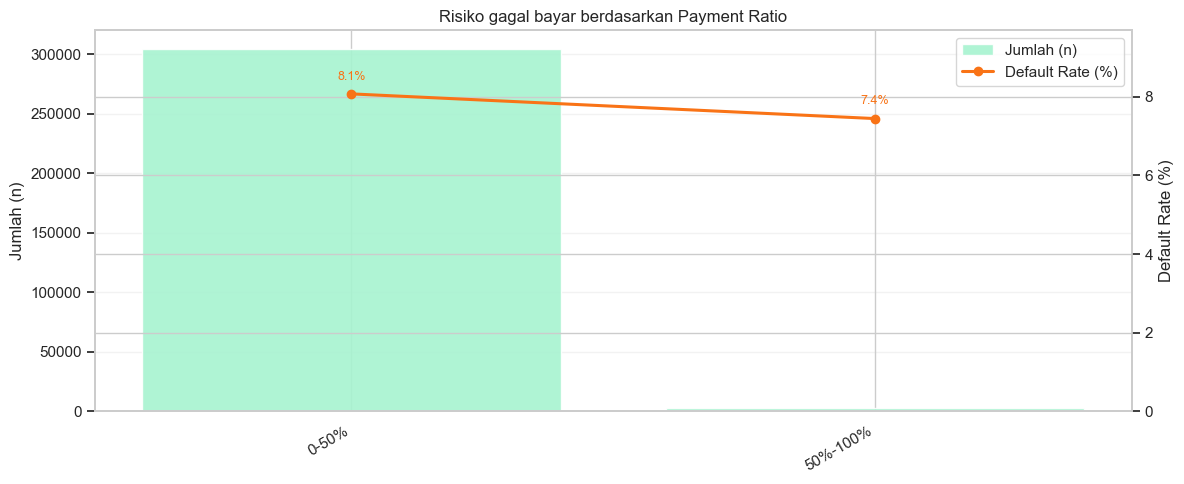

In [446]:
merged_df['PAYMENT_RATIO_BINNING'] = pd.cut(merged_df['PAYMENT_RATIO'], bins=[0, 0.5, 1, 2], labels=['0-50%', '50%-100%', '100%-200%'])
plot_risk_comparison(merged_df, 'PAYMENT_RATIO_BINNING', 'Risiko gagal bayar berdasarkan Payment Ratio')

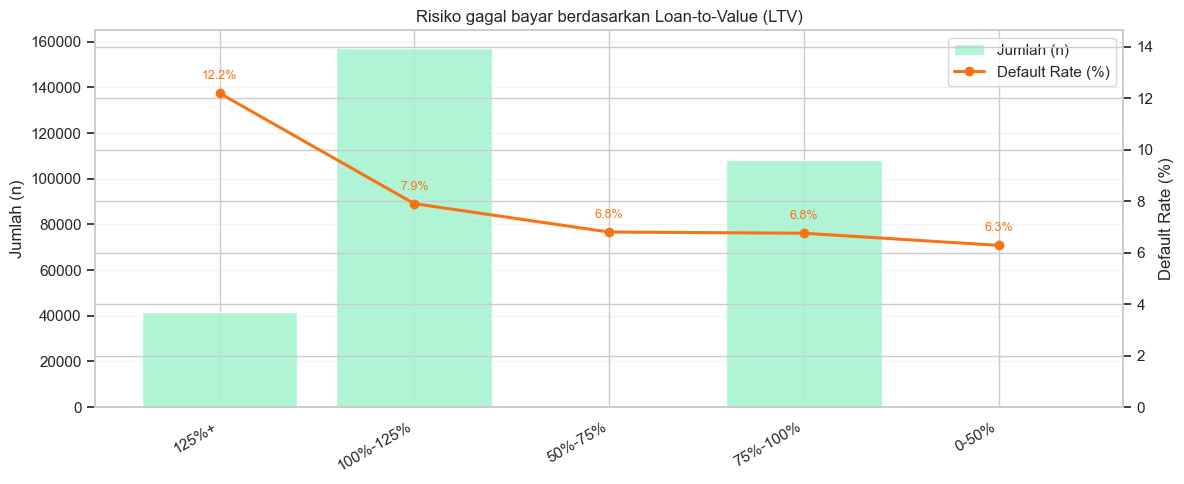

In [447]:
merged_df['LTV'] = merged_df['AMT_CREDIT'] / merged_df['AMT_GOODS_PRICE']
merged_df['LTV_BINNING'] = pd.cut(merged_df['LTV'], bins=[0, 0.5, 0.75, 1, 1.25, 2], labels=['0-50%', '50%-75%', '75%-100%', '100%-125%', '125%+'])
plot_risk_comparison(merged_df, 'LTV_BINNING', 'Risiko gagal bayar berdasarkan Loan-to-Value (LTV)')

In [448]:
compare_means(merged_df, 'TOTAL_CREDITS')


--- Analisis Komparatif untuk: TOTAL_CREDITS ---


,mean,median,min,max,count
TARGET,,,,,
0,4.778464,4.0,0.0,116.0,282686
1,4.613092,3.0,0.0,55.0,24825


In [449]:
compare_means(merged_df, 'RATIO_DEBT_TO_CREDIT_MEAN')


--- Analisis Komparatif untuk: RATIO_DEBT_TO_CREDIT_MEAN ---


,mean,median,min,max,count
TARGET,,,,,
0,0.318887,0.099624,-124.170532,7744.318081,282686
1,0.349975,0.173975,-0.800616,641.730082,24825


In [450]:
merged_df['RATIO_DEBT_TO_CREDIT_MEAN'].value_counts()

RATIO_DEBT_TO_CREDIT_MEAN
0.000000    121601
1.000000       648
0.500000       602
0.333333       515
0.250000       366
             ...  
0.238850         1
0.505950         1
0.054313         1
0.010335         1
0.296100         1
Name: count, Length: 179713, dtype: int64

In [451]:
merged_df['RATIO_DEBT_TO_CREDIT_MEAN_BIN'] = pd.cut(merged_df['RATIO_DEBT_TO_CREDIT_MEAN'], bins=[-0.1, 0.25, 0.5, 1.0, 2.0], labels=['0-25%', '25%-50%', '50%-100%', '100%+'])
merged_df['TOTAL_CREDITS_BIN'] = pd.cut(merged_df['TOTAL_CREDITS'], bins=[0, 3, 10, 117], labels=['0-3', '3-10', '10+'])

In [452]:
merged_df['TOTAL_CREDITS_BIN'].value_counts()

TOTAL_CREDITS_BIN
3-10    126582
0-3     104632
10+      32277
Name: count, dtype: int64

In [453]:
merged_df['RATIO_DEBT_TO_CREDIT_MEAN_BIN'].value_counts()

RATIO_DEBT_TO_CREDIT_MEAN_BIN
0-25%       219868
25%-50%      58727
50%-100%     27232
100%+         1305
Name: count, dtype: int64

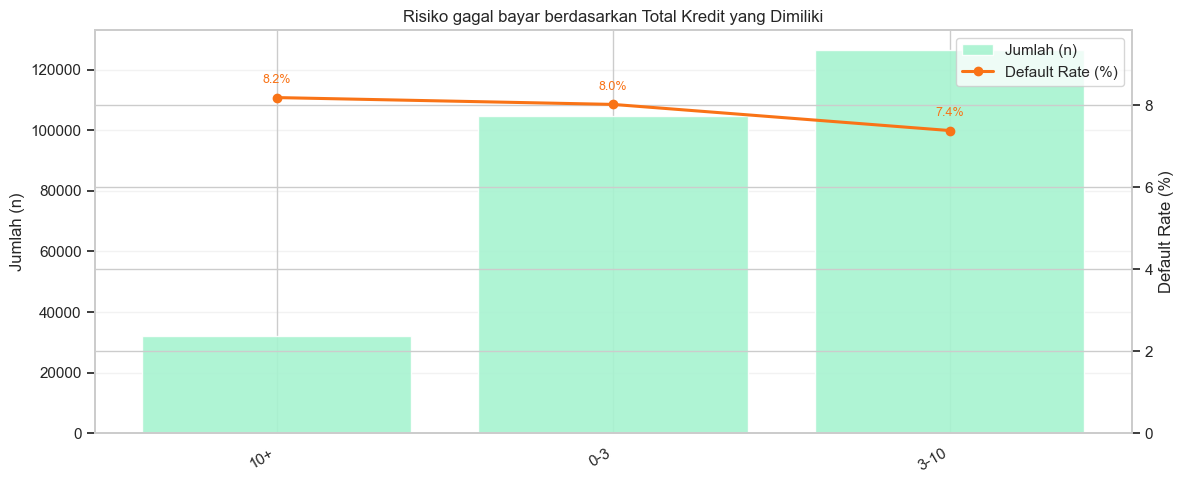

In [454]:
plot_risk_comparison(merged_df, 'TOTAL_CREDITS_BIN', 'Risiko gagal bayar berdasarkan Total Kredit yang Dimiliki')

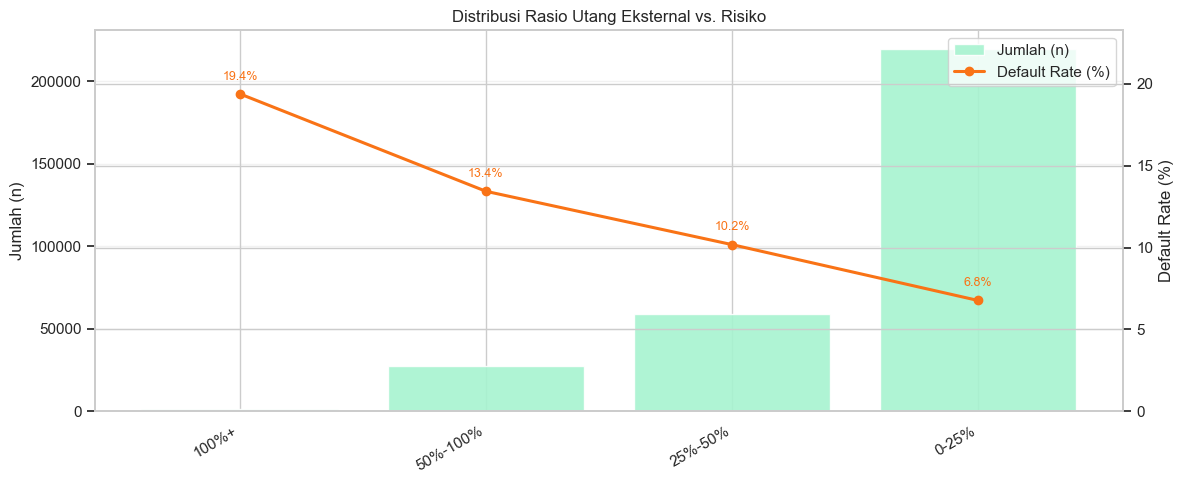

In [ ]:
plot_risk_comparison(merged_df, 'RATIO_DEBT_TO_CREDIT_MEAN_BIN', 'Distribusi Rasio Utang terhadap Limit Kredit vs. Risiko')

In [456]:
merged_df['HAS_ACTIVE_CREDIT_EXT'] = (merged_df['STATUS_ACTIVE'] > 0).astype(int)
merged_df['HAS_BAD_DEBT_EXT'] = (merged_df['STATUS_BAD_DEBT'] > 0).astype(int)

In [457]:
has_bad_debt_ext = merged_df['HAS_BAD_DEBT_EXT'] == 1
print(f'Total klien dengan riwayat Bad Debt di pinjaman eksternal: {has_bad_debt_ext.sum()}')
print(f'Tingkat gagal bayar di antara klien dengan riwayat Bad Debt: {merged_df.loc[has_bad_debt_ext, "TARGET"].mean():.2%}')
print(f'Tingkat gagal bayar di antara klien tanpa riwayat Bad Debt: {merged_df.loc[~has_bad_debt_ext, "TARGET"].mean():.2%}')

Total klien dengan riwayat Bad Debt di pinjaman eksternal: 20
Tingkat gagal bayar di antara klien dengan riwayat Bad Debt: 20.00%
Tingkat gagal bayar di antara klien tanpa riwayat Bad Debt: 8.07%


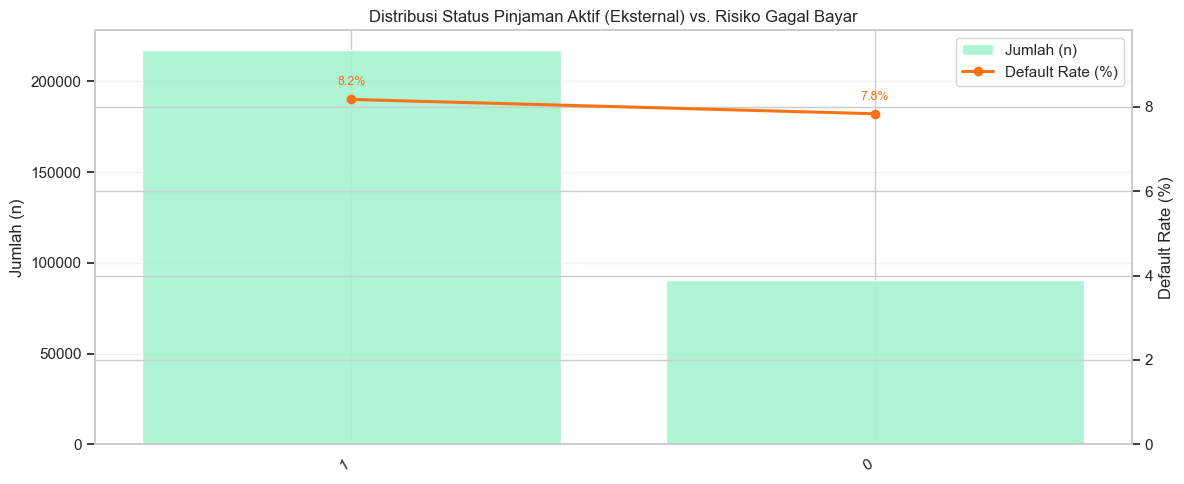

In [458]:
plot_risk_comparison(
    merged_df, 'HAS_ACTIVE_CREDIT_EXT',
    'Distribusi Status Pinjaman Aktif (Eksternal) vs. Risiko Gagal Bayar',
)

In [459]:
merged_df['INST_LATE_PAYMENT_RATIO_BINNED'] = pd.cut(
    merged_df['PREV_INST_LATE_PAYMENT_RATIO_MEAN'],
    bins=[-0.01, 0, 0.1, 0.3, 1],
    labels=['0%', '0-10%', '10-30%', '30%+']
)
merged_df['INST_LATE_PAYMENT_RATIO_BINNED'].value_counts()

INST_LATE_PAYMENT_RATIO_BINNED
0%        157342
0-10%     104356
10-30%     39138
30%+        6675
Name: count, dtype: int64

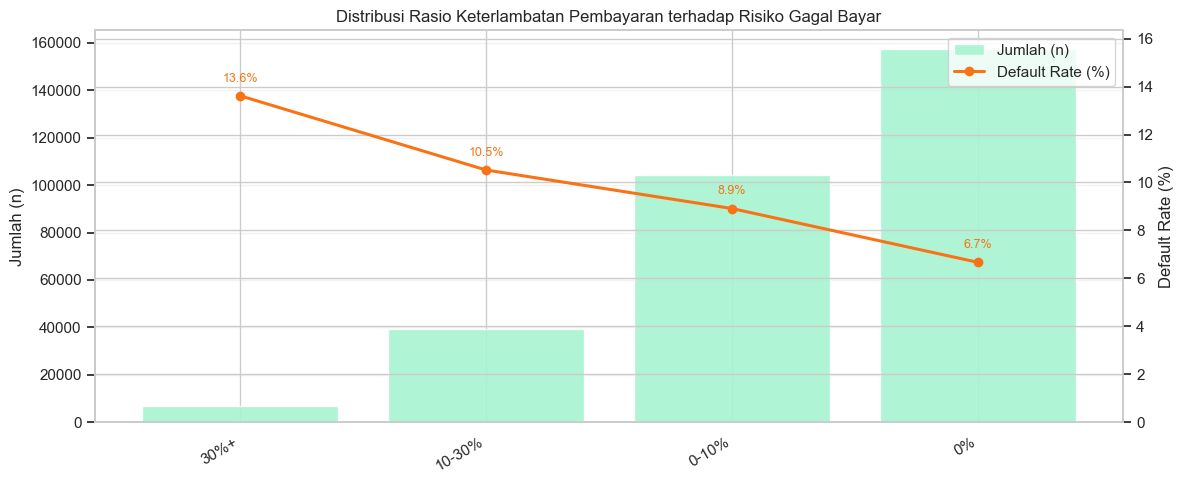

In [461]:
plot_risk_comparison(merged_df, 'INST_LATE_PAYMENT_RATIO_BINNED', 'Distribusi Rasio Keterlambatan Pembayaran terhadap Risiko Gagal Bayar')

In [463]:
list_cols_portfolio_type = ['PREV_PORTFOLIO_POS_RATIO', 'PREV_PORTFOLIO_CASH_RATIO', 'PREV_PORTFOLIO_CARS_RATIO']

for col in list_cols_portfolio_type:
    merged_df[col + '_Binned'] = pd.cut(
        merged_df[col],
        bins=[-1, 0, 1],
        labels=['Not Portfolio', 'The Portfolio']
    )

,label,n,default_rate
1,Cash,149201,0.084457
0,POS,267950,0.080590
2,Cars,297,0.050505


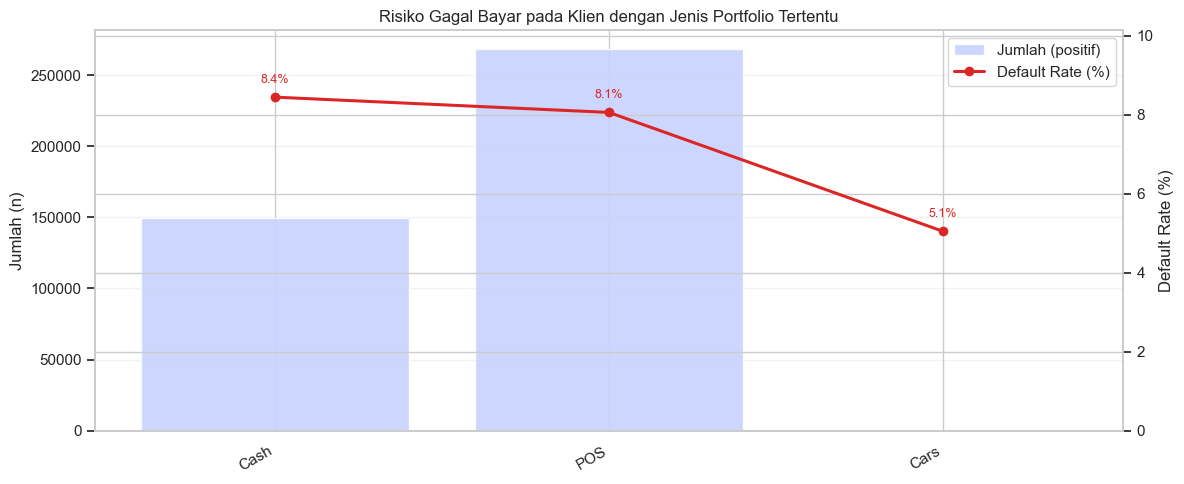

In [ ]:
plot_binary_reason_risk(
    merged_df,
    cols=[c + "_Binned" for c in list_cols_portfolio_type],
    labels=["POS", "Cash", "Cars"],
    title="Risiko Gagal Bayar pada Klien dengan Jenis Portfolio Tertentu",
    positive_label="The Portfolio",
    min_count=200
 )

In [464]:
list_cols_product_type = ['PREV_PRODUCT_TYPE_XSELL_RATIO', 'PREV_PRODUCT_TYPE_WALKIN_RATIO']

for col in list_cols_product_type:
    merged_df[col + '_Binned'] = pd.cut(
        merged_df[col],
        bins=[-1, 0, 1],
        labels=['Not Portfolio', 'The Portfolio']
    )

,label,n,default_rate
1,Walk-in,72663,0.109739
0,X-Sell,151287,0.079683


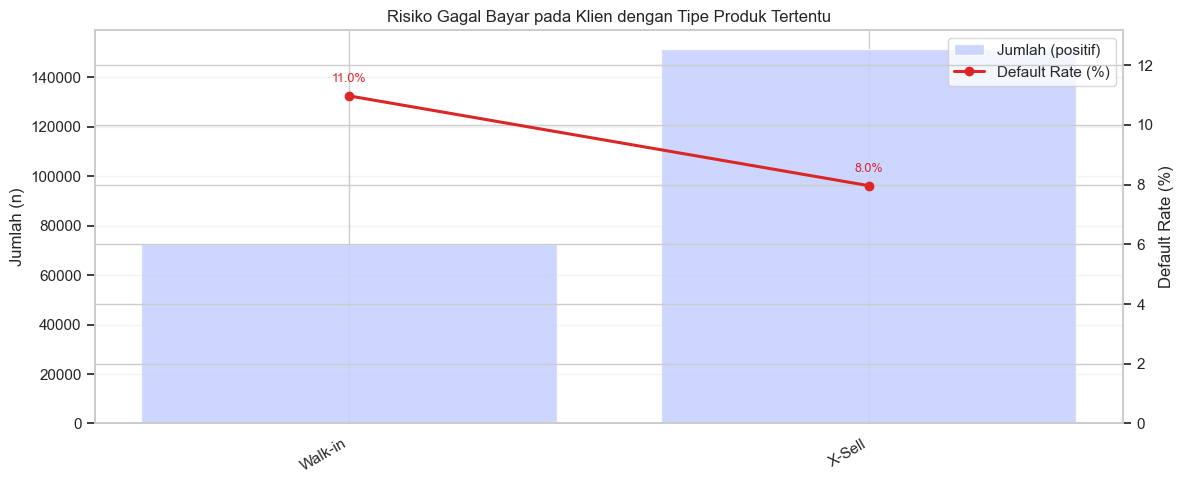

In [465]:
plot_binary_reason_risk(
    merged_df,
    cols=[c + "_Binned" for c in list_cols_product_type],
    labels=["X-Sell", "Walk-in"],
    title="Risiko Gagal Bayar pada Klien dengan Tipe Produk Tertentu",
    positive_label="The Portfolio",
    min_count=200
 )

In [ ]:
merged_df.to_csv('for_modelling_task.csv', index=False)

#### Visualisasi Akhir

,AGE_YEARS_BINNED,DTI_BINNING,INST_LATE_PAYMENT_RATIO_BINNED,default_rate,n
27,25-29,200%-500%,30%+,0.209205,478
43,30-39,200%-500%,30%+,0.188078,973
10,18-24,200%-500%,10-30%,0.167095,778
26,25-29,200%-500%,10-30%,0.157956,2564
9,18-24,200%-500%,0-10%,0.150943,1908
6,18-24,100%-200%,10-30%,0.142857,511
30,25-29,500%+,10-30%,0.137970,877
23,25-29,100%-200%,30%+,0.136564,227
59,40-49,200%-500%,30%+,0.133603,741
13,18-24,500%+,0-10%,0.132762,467


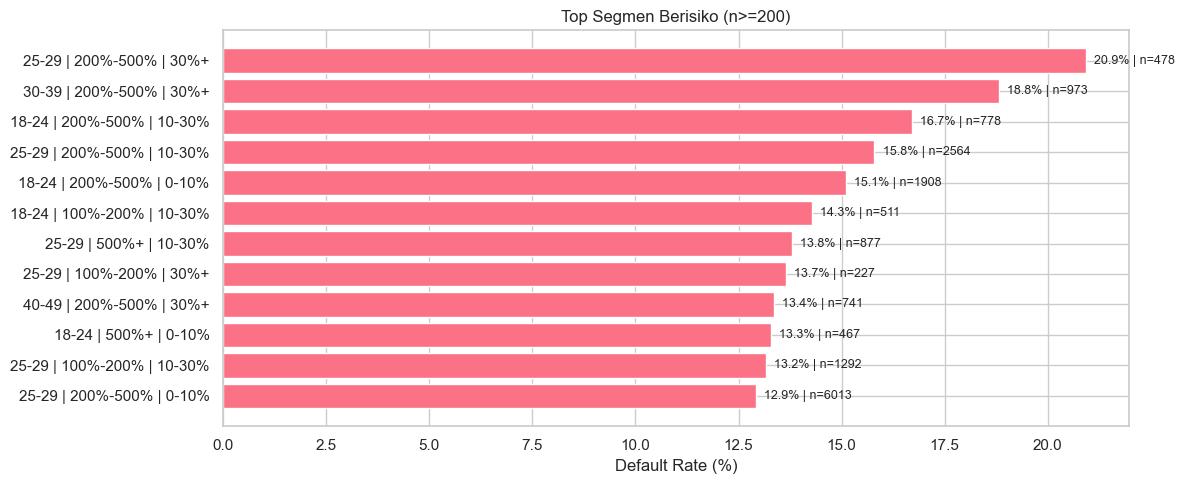

In [470]:
req = ["AGE_YEARS_BINNED", "DTI_BINNING", "INST_LATE_PAYMENT_RATIO_BINNED"]
missing = [c for c in req if c not in merged_df.columns]

if missing:
    print("[INFO] Kolom binning belum tersedia:", missing)
    print("Pastikan binning sudah dibuat di cell sebelumnya, lalu jalankan ulang cell ini.")
else:
    MIN_N = 200     
    TOP_K = 12

    seg = (
        merged_df.groupby(req)["TARGET"]
        .agg(default_rate="mean", n="count")
        .reset_index()
    )

    seg = seg[seg["n"] >= MIN_N].sort_values(["default_rate", "n"], ascending=[False, False]).head(TOP_K)

    display(seg)

    if seg.empty:
        print(f"[INFO] Tidak ada segmen dengan n >= {MIN_N}. Turunkan MIN_N untuk tetap menampilkan.")
    else:
        labels = seg.apply(
            lambda r: f"{r['AGE_YEARS_BINNED']} | {r['DTI_BINNING']} | {r['INST_LATE_PAYMENT_RATIO_BINNED']}",
            axis=1,
        )
        y = seg["default_rate"] * 100

        plt.figure(figsize=(12, 5))
        plt.barh(labels, y, color="#fb7185")
        plt.gca().invert_yaxis()
        plt.xlabel("Default Rate (%)")
        plt.title(f"Top Segmen Berisiko (n>={MIN_N})")

        # label % di ujung bar + label n
        for i, (pct, n) in enumerate(zip(y, seg["n"])):
            plt.text(pct + 0.2, i, f"{pct:.1f}% | n={int(n)}", va="center", fontsize=9)

        plt.tight_layout()
        plt.show()